# Machine-Learning-and-Statistics-Assessment-2019

## This Assessment concerns the well-known Boston House Price Dataset.

### The following is a snippet from the original creation of the dataset

## Hedonic housing prices and the demand for clean air
Harrison, Jr. , David; Rubinfeld, Daniel L. 1978-03
Citation: Harrison, Jr., David, Rubinfeld, Daniel L. (1978/03).
"Hedonic housing prices and the demand for clean air." Journal of Environmental Economics and Management 5(1): 81-102.

This paper investigates the methodological problems associated with the use of housing market data to measure the willingness to pay for clean air. With the use of a hedonic housing price model and data for the Boston metropolitan area, quantitative estimates of the willingness to pay for air quality improvements are generated. Marginal air pollution damages (as revealed in the housing market) are found to increase with the level of air pollution and with household income. The results are relatively sensitive to the specification of the hedonic housing price equation, but insensitive to the specification of the air quality demand equation


###  What is Boston DataSet ? 
A Dataset derived from information collected by the U.S. Census Service concerning housing in the area of Boston Mass. This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

### What information was collected for the Boston DataSet ?
The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes that available here.

This data base is far superior to others because it contains a large number of neighborhood variables (necessary to isolate the independent influence of air pollution) and more reliable air pollution data.

First, we will import the required libraries, I may need for this project

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [4]:
import statsmodels.stats.weightstats as ws
import statsmodels.api as smapi
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from keras import models
from keras import layers
# Using statsmodels.
import statsmodels.api as sm

Using TensorFlow backend.


In [6]:
%matplotlib inline
pl.rcParams["figure.figsize"] = (18,8)#selected sizing for plots

In [7]:
# importing the boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
# print the keys in the dataset
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### These are essentially keys to a dictionary

##### data: info for different houses
#####  target: prices for different houses
##### feature_names: names of the features
##### DESCR: describes the dataset

### Now lets have a look to see what exactly is in our data set

In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


The above is a list of each of the columns names, which on research are also the variables used , but we need more information on this

In [9]:
print(boston.data.shape)

(506, 13)


This means there are 13 Columns and 506 Rows consisting of the following

This describes the shape of the data set which consists of data on 506 Houses through 13 variables

In [10]:
# DESC should tell us what the data is about
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Expressing the benefits of reduced urban air pollution concentrations in monetary terms is a difficult task, despite the fact that the general nature of the benefits is reasonably well established.’ Several attempts have been made to utilize economic analysis to estimate the dollar benefits of air quality improve- ments. One approach is to proxy willingness to pay by measuring either the added cost to society from increased air pollution, or equivalently the reduced costs associated with air quality improvement.” A second technique infers willing ness to pay for better air quality from an analysis of the housing market, on the presumption that individuals will pay more for a unit located in an area with good air quality than for an otherwise identical unit located in an area with poor air quality.


JOURNAL OF ESVIRONMENTAL ECONOMICS AND MANAGEMENT 5, 81-102 (1978) 

From the Original paper, I can now understand and appreciate the variables collected in this dataset, for instance I will assume the following variable, could have an effect on house prices, and would be a fundamental variable on the willingness to pay for clean air as per initial paper.

 - NOX      nitric oxides concentration (parts per 10 million)
 
As the project requirements are to create a neural network that can predict the median price based on the other variables in the dataset, using all the othervariables, or select a subset, futher investigation is required.

The next step I will use PANDAS to create a dataframe from the dataset. Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [11]:
# create a new dataset called Boston using the feature_names as the columns

df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
np.round(df.describe(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970


In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [14]:
# we are missing one column MEDV , which I will rename PRICE
df['PRICE'] = boston['target']
# lets have a look at the df again
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
display(df.tail())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [16]:
np.round(df.describe(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


### Data Visualization

Lets have a quick look at this stage , as to how the data set would look showing the distribution of the price variables


Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable *PRICE*. We will use the distplot function from the seaborn library.


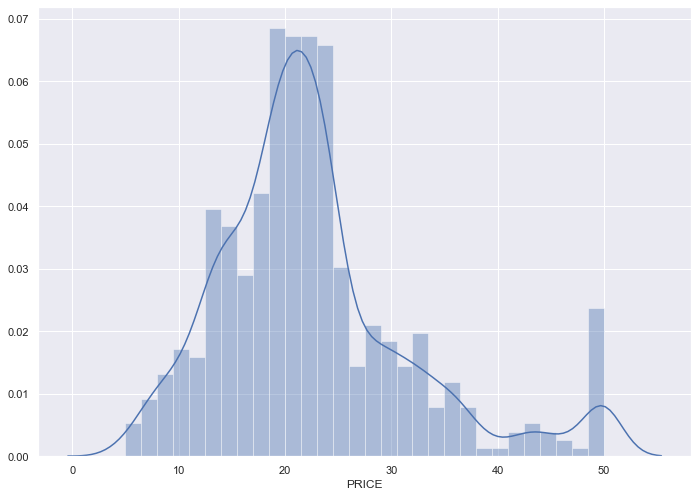

In [17]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['PRICE'], bins=30)
pl.show()

We see that the values of *PRICE* are distributed normally with few outliers.

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Now lets look at the entire dataset 

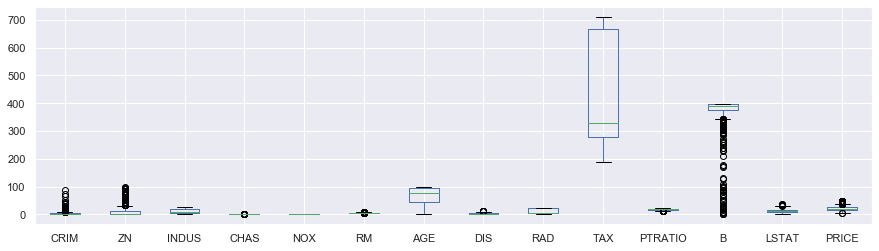

In [18]:
df.boxplot(figsize=(15,4))
pl.ion()

From the BOXPLOT, it is difficult to compare and contrast the correlations between all the data points, possibly normalising all the values to the same range , may make it easier to understand

"In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging. ... In the case of normalization of scores in educational assessment, there may be an intention to align distributions to a normal distribution.

Learning algorithms have affinity towards certain data types on which they perform incredibly well. ... In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing.

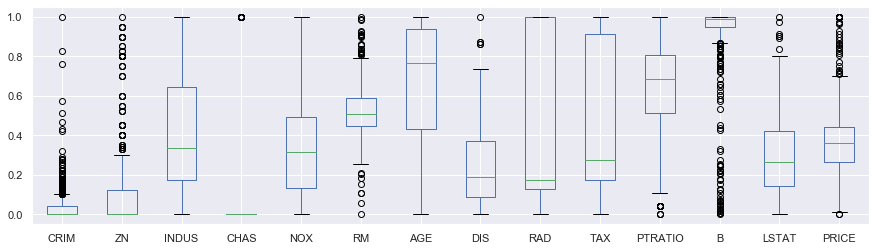

In [19]:
from sklearn import preprocessing as pp
minmax=pp.MinMaxScaler()
x=df.values
scaled=minmax.fit_transform(x)
Bdf=pd.DataFrame(scaled)
headings=list(df.columns.values)
Bdf.columns=headings
Bdf.boxplot(figsize=(15,4))

At first glance, I can see some similarities in variables, such as , there are a large amount of outliers,and others then tend to be quite less. Some variables not widely distributed with lots of outliers, and others than have very few outliers.

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

### Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data.

We count the number of missing values for each feature using isnull()



In [20]:
df.isnull().sum()
# However, there are no missing values in this dataset as shown below.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [21]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

All data are floats, which means this is most likely a continuous variable, including the target, predicting it as a regression problem.

Lets take another look at the basic descriptive statistics on all the data colums available, which now after adding in the medv variable will include the price variable of all the 506 houses of which the data was collected on. 

In [22]:
np.round(df.describe(),3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.378,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.126,24.000,711.000,22.000,396.900,37.970,50.000


The prices of the house indicated by the variable MEDV is our target variable, which is now subsequently changed to the house price, and the remaining are the feature variables based on which we will predict the value of a house.

On a quick glance at the above table, if I were to consider the part core of the investiagtive analysis done on the data set when it was crated , 
- NOX      nitric oxides concentration (parts per 10 million)
It seems that when NOX levels, are at the highest of 0.871 the price of the house is also at its max 0f $50,000, and when the NOX levels are at the lowest at 0.385 the house price is also at its lowest.  

This leads me to that visualisation of the dataset may produce a more descriptive view of the dataset.


The average nitric oxide concentration (in parts per 10 million) is .55. 

The neighborhood with the least NOX has .38, the one with the most has .87.

I will try to explore this variable more , on ascending values

In [23]:
noxtotal = df.sort_values("NOX", ascending = False, )
noxtotal.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
151,1.49632,0.0,19.58,0.0,0.871,5.404,100.0,1.5916,5.0,403.0,14.7,341.60,13.28,19.6
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
153,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
149,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
148,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32,17.8
147,2.36862,0.0,19.58,0.0,0.871,4.926,95.7,1.4608,5.0,403.0,14.7,391.71,29.53,14.6


I have selected a range of 20 Houses at the head of my data set , as these the highest level of NOX, with a slight decrease 
at house selection 17.

So here follows a brief summary of NOX, what it is and why it may affect house prices

Lets continue on this investigative path assuming .......

In atmospheric chemistry, NOx is a generic term for the nitrogen oxides that are most relevant for air pollution, namely nitric oxide (NO) and nitrogen dioxide (NO
2 ).[1][2] These gases contribute to the formation of smog and acid rain, as well as affecting tropospheric ozone.

NOx gases are usually produced from the reaction among nitrogen and oxygen during combustion of fuels, such as hydrocarbons, in air; especially at high temperatures, such as occur in car engines.[1][2][3] In areas of high motor vehicle traffic, such as in large cities, the nitrogen oxides emitted can be a significant source of air pollution. NOx gases are also produced naturally by lightning.

The term NOx is chemistry shorthand for molecules containing one nitrogen and one or more oxygen atom. It is generally meant to include nitrous oxide (N2O),[1] although nitrous oxide is a fairly inert oxide of nitrogen that has many uses as an oxidizer for rockets and car engines, an anesthetic, and a propellant for aerosol sprays and whipped cream. Nitrous oxide plays hardly any role in air pollution, although it may have a significant impact on the ozone layer,[4] and is a significant greenhouse gas. 

- Nox - nitric oxides concentration (parts per 10 million) Levels at the highest 0.871

- Price levels are below the average of $22.533

- CRIM Crime Rate seems quite low 

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. is pratically non existance, which makes sense

- INDUS - proportion of non-retail business acres per town, is well above the average of 11.137 and closer to max of 27.740

- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), low percentage here of maybe 5-6 houses

- RM - average number of rooms per dwelling, present is more above the average of 6.285

- AGE- proportion of owner-occupied units built prior to 1940, Now this is interesting, where Nox is at its highest, the houses seem to be older , leaning towards with science and new data on Nox, discovered later than 1940.

- DIS - weighted distances to five Boston employment centres, distance is very low here  

- RAD - index of accessibility to radial highways, as expected this is very low when Nox is high, considering in areas of high motor vehicle traffic, such as in large cities, the nitrogen oxides emitted can be a significant source of air pollution 

- TAX - full-value property-tax rate per $10,000, tax seems to be around average here

- PTRATIO - pupil-teacher ratio by town, is 22 at its highest and 12.6 at its lowest, when Nox is at its highest, this ratio is below average , hence rising when Nox levels reduce, possibly a factor where couples buying and plan to start a family, consider cleaner air fundamental

- LSTAT - % lower status of the population, this ranges from low to high, not indicating a lot to me.

- MEDV - Median value of owner-occupied homes in $1000's,price wise, houses all seem to bebelow average indicating a possible attribute on the value of the property, so when Nox levels are high , prices are below average.

In [24]:
noxtotal = df.sort_values("NOX", ascending = False, )
noxtotal.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
199,0.03150,95.0,1.47,0.0,0.403,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03,31.1
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38,29.1
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8


- Nox - nitric oxides concentration (parts per 10 million) Levels at the lowest 0.404

- Price levels are most definetly above average when levels are lowest, with a couple nearing max price

- CRIM Crime Rate seems very lowhere, nearly non existence 

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. are very high, seems larger houses may have the benefit of lower Nox levels, considering the price is more, the area would be better

- INDUS - proportion of non-retail business acres per town, is very low here, if one relates Nox levels to retail areas

- CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), lower percentage when Nox levels are high, which I find confusing, as you would think living beside a rive, would produce cleaner air, clearly not.

- RM - average number of rooms per dwelling, above average again, but much higher than when Nox levels are high

- AGE- proportion of owner-occupied units built prior to 1940, Now this is also interesting, houses built around areas where Nox level are low, seem to of been built more recent, than 1940, possibly because of more knowledge of the air, of simply with more efficient fiter systems  

- DIS - weighted distances to five Boston employment centres, Very high showing maybe less cars in the area

- RAD - index of accessibility to radial highways, even lower, indicating these houses are far distance from highways, with high volumes of traffic


- TAX - full-value property-tax rate per $10,000, tax seems much higher, indicating larger homes, more affluent area

- PTRATIO - pupil-teacher ratio by town, is 22 at its highest and 12.6 at its lowest, when Nox is at its lowest, this ratio is average

- LSTAT - % lower status of the population, below average, again not indicating a lot to me.

- MEDV - Median value of owner-occupied homes in $1000's, house prices are well above average here, which is a very interesting attribute

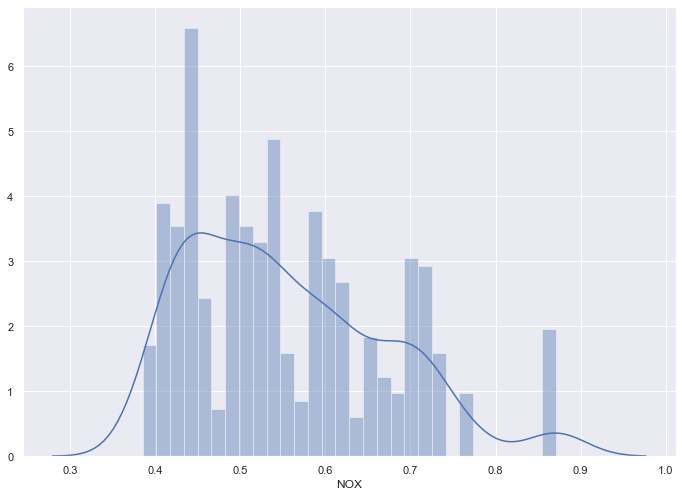

In [25]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['NOX'], bins=30)
pl.show()

Lets, look at the other variables to see if we notice any relationship between them and the price values

I wiil look briefly at thr top five and bottom five of each variable, to see if anything jumps out at me


In [26]:
crimtotal = df.sort_values("CRIM", ascending = False, )
crimtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


In [27]:
crimtotal = df.sort_values("CRIM", ascending = False, )
crimtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23,22.0
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0


## Result
- House Prices seem to be lower where crime rate is high
- House Prices seem to be higher where crime rat is lower

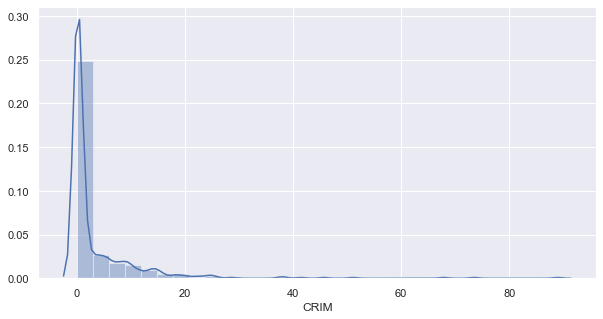

In [28]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,5)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['CRIM'], bins=30)
pl.show()

In [29]:
zntotal = df.sort_values("ZN", ascending = False, )
zntotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9


In [30]:
zntotal = df.sort_values("ZN", ascending = False, )
zntotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34,21.4
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## Result
- both finds house prices above average on this small selection, as opposed to only one at $11,900

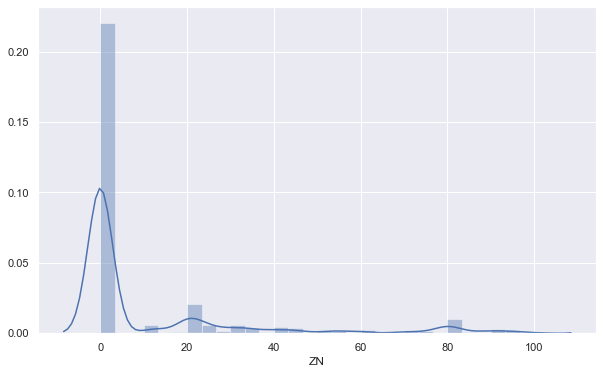

In [31]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['ZN'], bins=30)
pl.show()

In [32]:
industotal = df.sort_values("INDUS", ascending = False, )
industotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1


In [33]:
industotal = df.sort_values("INDUS", ascending = False, )
industotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
349,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0


## Result
- House Prices are lower where the proportion of non retail business acres is at its highest, and prices seem to be above average where there are higher retail business acres, possibly suggesting more employment in the area, higher household income

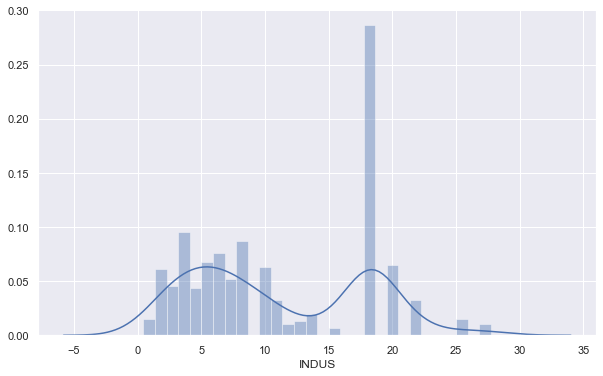

In [34]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['INDUS'], bins=30)
pl.show()

In [35]:
Chastotal = df.sort_values("CHAS", ascending = False, )
Chastotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
210,0.17446,0.0,10.59,1.0,0.489,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7
236,0.52058,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8.0,307.0,17.4,388.45,9.54,25.1
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3


In [36]:
Chastotal = df.sort_values("CHAS", ascending = False, )
Chastotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
164,2.24236,0.0,19.58,0.0,0.605,5.854,91.8,2.4220,5.0,403.0,14.7,395.11,11.64,22.7
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43,24.3
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## Result
- This goes beyound my way of my thoughts, as I would of thought houses beside the river would of been at a higher value.

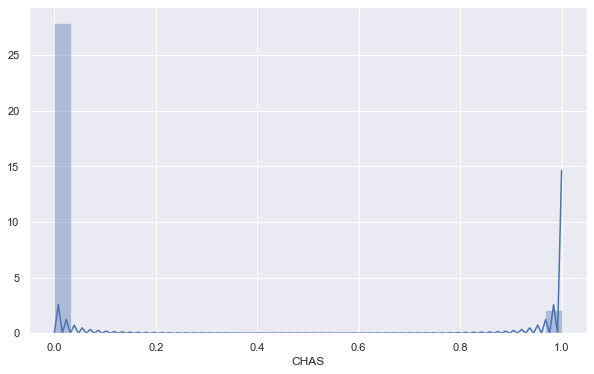

In [37]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['CHAS'], bins=30)
pl.show()

In [38]:
RMtotal = df.sort_values("RM", ascending = False, )
RMtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
262,0.52014,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5.0,264.0,13.0,386.86,5.91,48.8
163,1.51902,0.0,19.58,1.0,0.605,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0


In [39]:
RMtotal = df.sort_values("RM", ascending = False, )
RMtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
384,20.08490,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
406,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5


## Result
- Houses with more rooms, seem higher in price , implying larger detached homes
- Houseswith less rooms, the values seem lower, indicating the possible differnce in property types, terraced, semi-detaches etc...or apartments

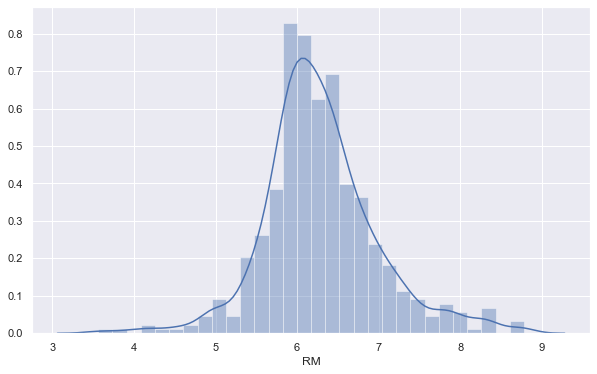

In [40]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['RM'], bins=30)
pl.show()

In [41]:
AGEtotal = df.sort_values("AGE", ascending = False, )
AGEtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
158,1.34284,0.0,19.58,0.0,0.605,6.066,100.0,1.7573,5.0,403.0,14.7,353.89,6.43,24.3
159,1.42502,0.0,19.58,0.0,0.871,6.510,100.0,1.7659,5.0,403.0,14.7,364.31,7.39,23.3
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
410,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2


In [42]:
AGEtotal = df.sort_values("AGE", ascending = False, )
AGEtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
70,0.08826,0.0,10.81,0.0,0.413,6.417,6.6,5.2873,4.0,305.0,19.2,383.73,6.72,24.2
43,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44,24.7
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54,23.4
74,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,26.6


## Results
- The older the house the price seems lower, but not really a good indicator on the size of my selection
- The newer homes, are price above average

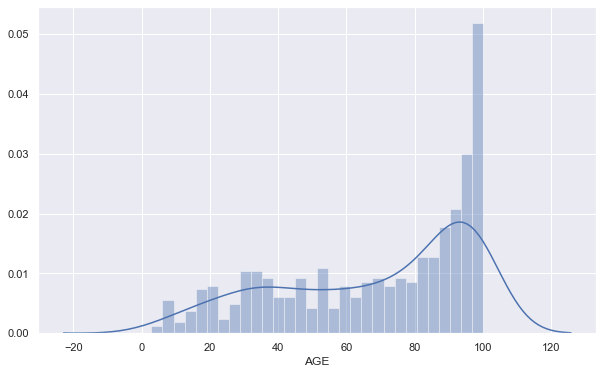

In [43]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['AGE'], bins=30)
pl.show()

In [44]:
DIStotal = df.sort_values("DIS", ascending = False, )
DIStotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1
351,0.07950,60.0,1.69,0.0,0.411,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4.0,411.0,18.3,392.33,7.79,18.6
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


In [45]:
DIStotal = df.sort_values("DIS", ascending = False, )
DIStotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
406,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9
373,11.10810,0.0,18.1,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


# Result 
- house price look more expensive closer to boston employment centres, yet further away they are still above average

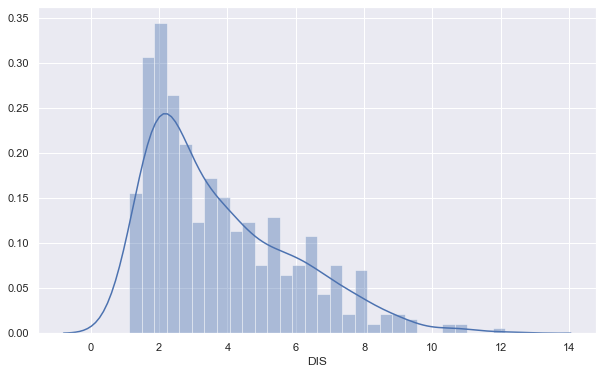

In [46]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['DIS'], bins=30)
pl.show()

In [47]:
RADtotal = df.sort_values("RAD", ascending = False, )
RADtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
409,14.43830,0.0,18.1,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78,27.5
398,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
404,41.52920,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
403,24.80170,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
402,9.59571,0.0,18.1,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31,12.1


In [48]:
RADtotal = df.sort_values("RAD", ascending = False, )
RADtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9
254,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57,21.9
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38,29.1
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03,31.1
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## Result
- With the above selection hous prices seem to be lower, when nearer to highways
- House prices seem higher in value further away

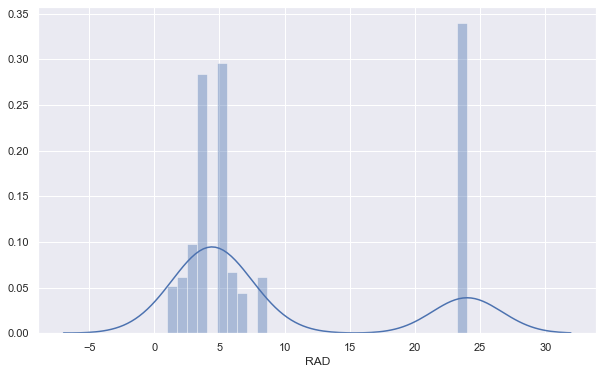

In [49]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['RAD'], bins=30)
pl.show()

In [50]:
TAXtotal = df.sort_values("TAX", ascending = False, )
TAXtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68,8.1
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06,15.2


In [51]:
TAXtotal = df.sort_values("TAX", ascending = False, )
TAXtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
125,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81,21.4
124,0.09849,0.0,25.65,0.0,0.581,5.879,95.8,2.0063,2.0,188.0,19.1,379.38,17.58,18.8
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,187.0,17.0,384.46,4.50,30.1


## Result
- Property tax is higher when prices are below average
- Houses in around average and above the tax is lowest

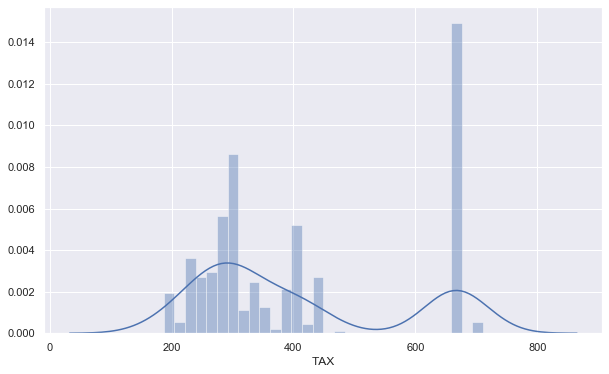

In [52]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['TAX'], bins=30)
pl.show()

In [53]:
PTRATIOtotal = df.sort_values("PTRATIO", ascending = False, )
PTRATIOtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19,16.2
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90,17.4


In [54]:
PTRATIOtotal = df.sort_values("PTRATIO", ascending = False, )
PTRATIOtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
267,0.57834,20.0,3.97,0.0,0.575,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16,43.5
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2.0,329.0,12.6,396.90,4.08,33.3


## Result
- Where the pupil teacher ratio is lower the value of houses are higher, indicating possibly private or smaller schools, lesser population
- Where the pupil ratio is at its highest, house prices are average and below, more inner city type developments possibly

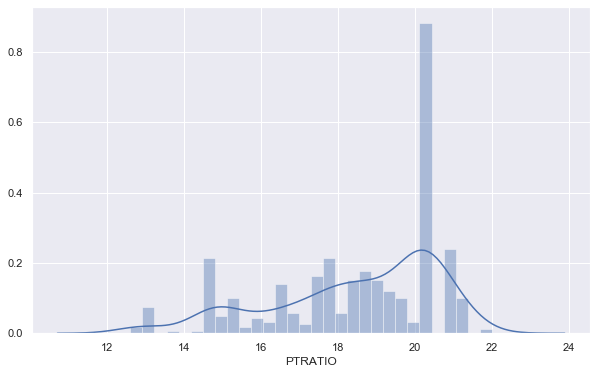

In [55]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['PTRATIO'], bins=30)
pl.show()

In [56]:
LSTATtotal = df.sort_values("LSTAT", ascending = False, )
LSTATtotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9


In [57]:
LSTATtotal = df.sort_values("LSTAT", ascending = False, )
LSTATtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87,36.4
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
162,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
161,1.46336,0.0,19.58,0.0,0.605,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0


## Result
- Lower status of the population is at its highest when houses prices are low
- When this status decreases house prices increase, suggesting are more affluent area, where its at its lowest point of 1.73 you can see a house price is found at its max value of 50,000, this is significant as houses in the dataset are cappped at 50,000
- Finding this , would suggest LSTAT as one of my more favourable variables for further investigation

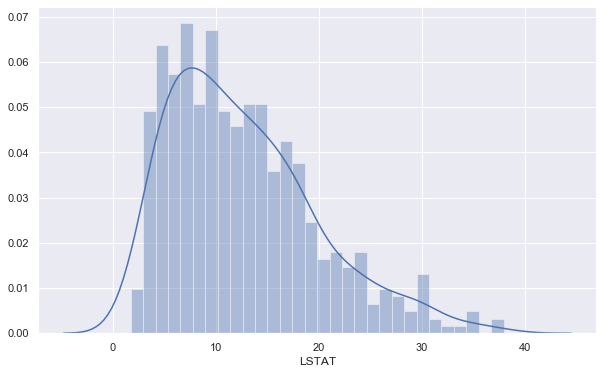

In [58]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,6)})

# plot a histogram showing the distribution of the Price values
sns.distplot(df['LSTAT'], bins=30)
pl.show()

From the above findings , the following variables have shown some type of relationship with the price

These are the variables that stood out for me, which have the most effect on house prices 

- LSTAT % lower status of the population
- PTRATIO pupil-teacher ratio by town
- RAD index of accessibility to radial highways
- CRIM per capita crime rate per town
- AGE proportion of owner-occupied units built priorto 1940
- RM average number of rooms per dwelling

Considering my target variable is the price, lets look at House Prices in the top 5 and bottom 5 and see if any variable stands out , or come close to our findings

- CRIM is very like our findings, highest price , very low crime rate and house value increase where crime rate decreases
- PTRatio is quite similar, where high values on houses , the PTRatio is lower
- RAD is high when prices are low, but only two house values are high when RAD is extremely low, this may be due to the selction I have made, so I may not include this variable in further analysis
- LSTAT the relationship here is quite strong, where LSTAT is low , prices are high and vice versa
- AGE Very like my findings, new homes are more expensive to older homes
- RM The more rooms per dwelling the higher the value of the property, indicating larger homes, and the less rooms per dwelling the lower the value of the homes, indicating smaller properties

#### Going forward, the above selection of variables will be the condensed dataset I will work from, excluding possibly RAD.

In [59]:
pricetotal = df.sort_values("PRICE", ascending = False, )
pricetotal.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
369,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.10,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0


In [60]:
noxtotal = df.sort_values("PRICE", ascending = False, )
noxtotal.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
399,9.91655,0.0,18.1,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
398,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0


Next, we create a correlation matrix that measures the linear relationships between the variables, of the entire dataset

The correlation matrix can be formed by using the corr function from the pandas dataframe library. 

We will use the heatmap function from the seaborn library to plot the correlation matrix.

In [61]:
correlation = df.corr().round(2)
display(correlation)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


The correlation coefficient ranges from -1 to 1. 

If the value is close to 1, it means that there is a strong positive correlation between the two variables. 

When it is close to -1, the variables have a strong negative correlation.

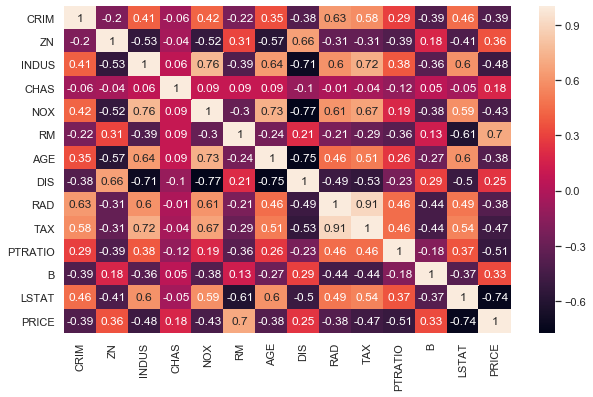

In [62]:
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)

Observations

To fit a linear regression model, we select those features which have a high correlation with our selected variable NOX. By looking at the correlation matrix we can see that INDUS has a strong positive correlation with NOX(0.76) where as DIS has the lowest level correlation with Nox-(0.77). 
    
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model, also the features DIS and AGE which have a correlation of -0.75.

- From the above coorelation plot we can see that PRICE is strongly correlated to LSTAT, RM

- RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

- CRIM, ZN, INDUS, NOX, AGE DIS are slightly less but still significant.


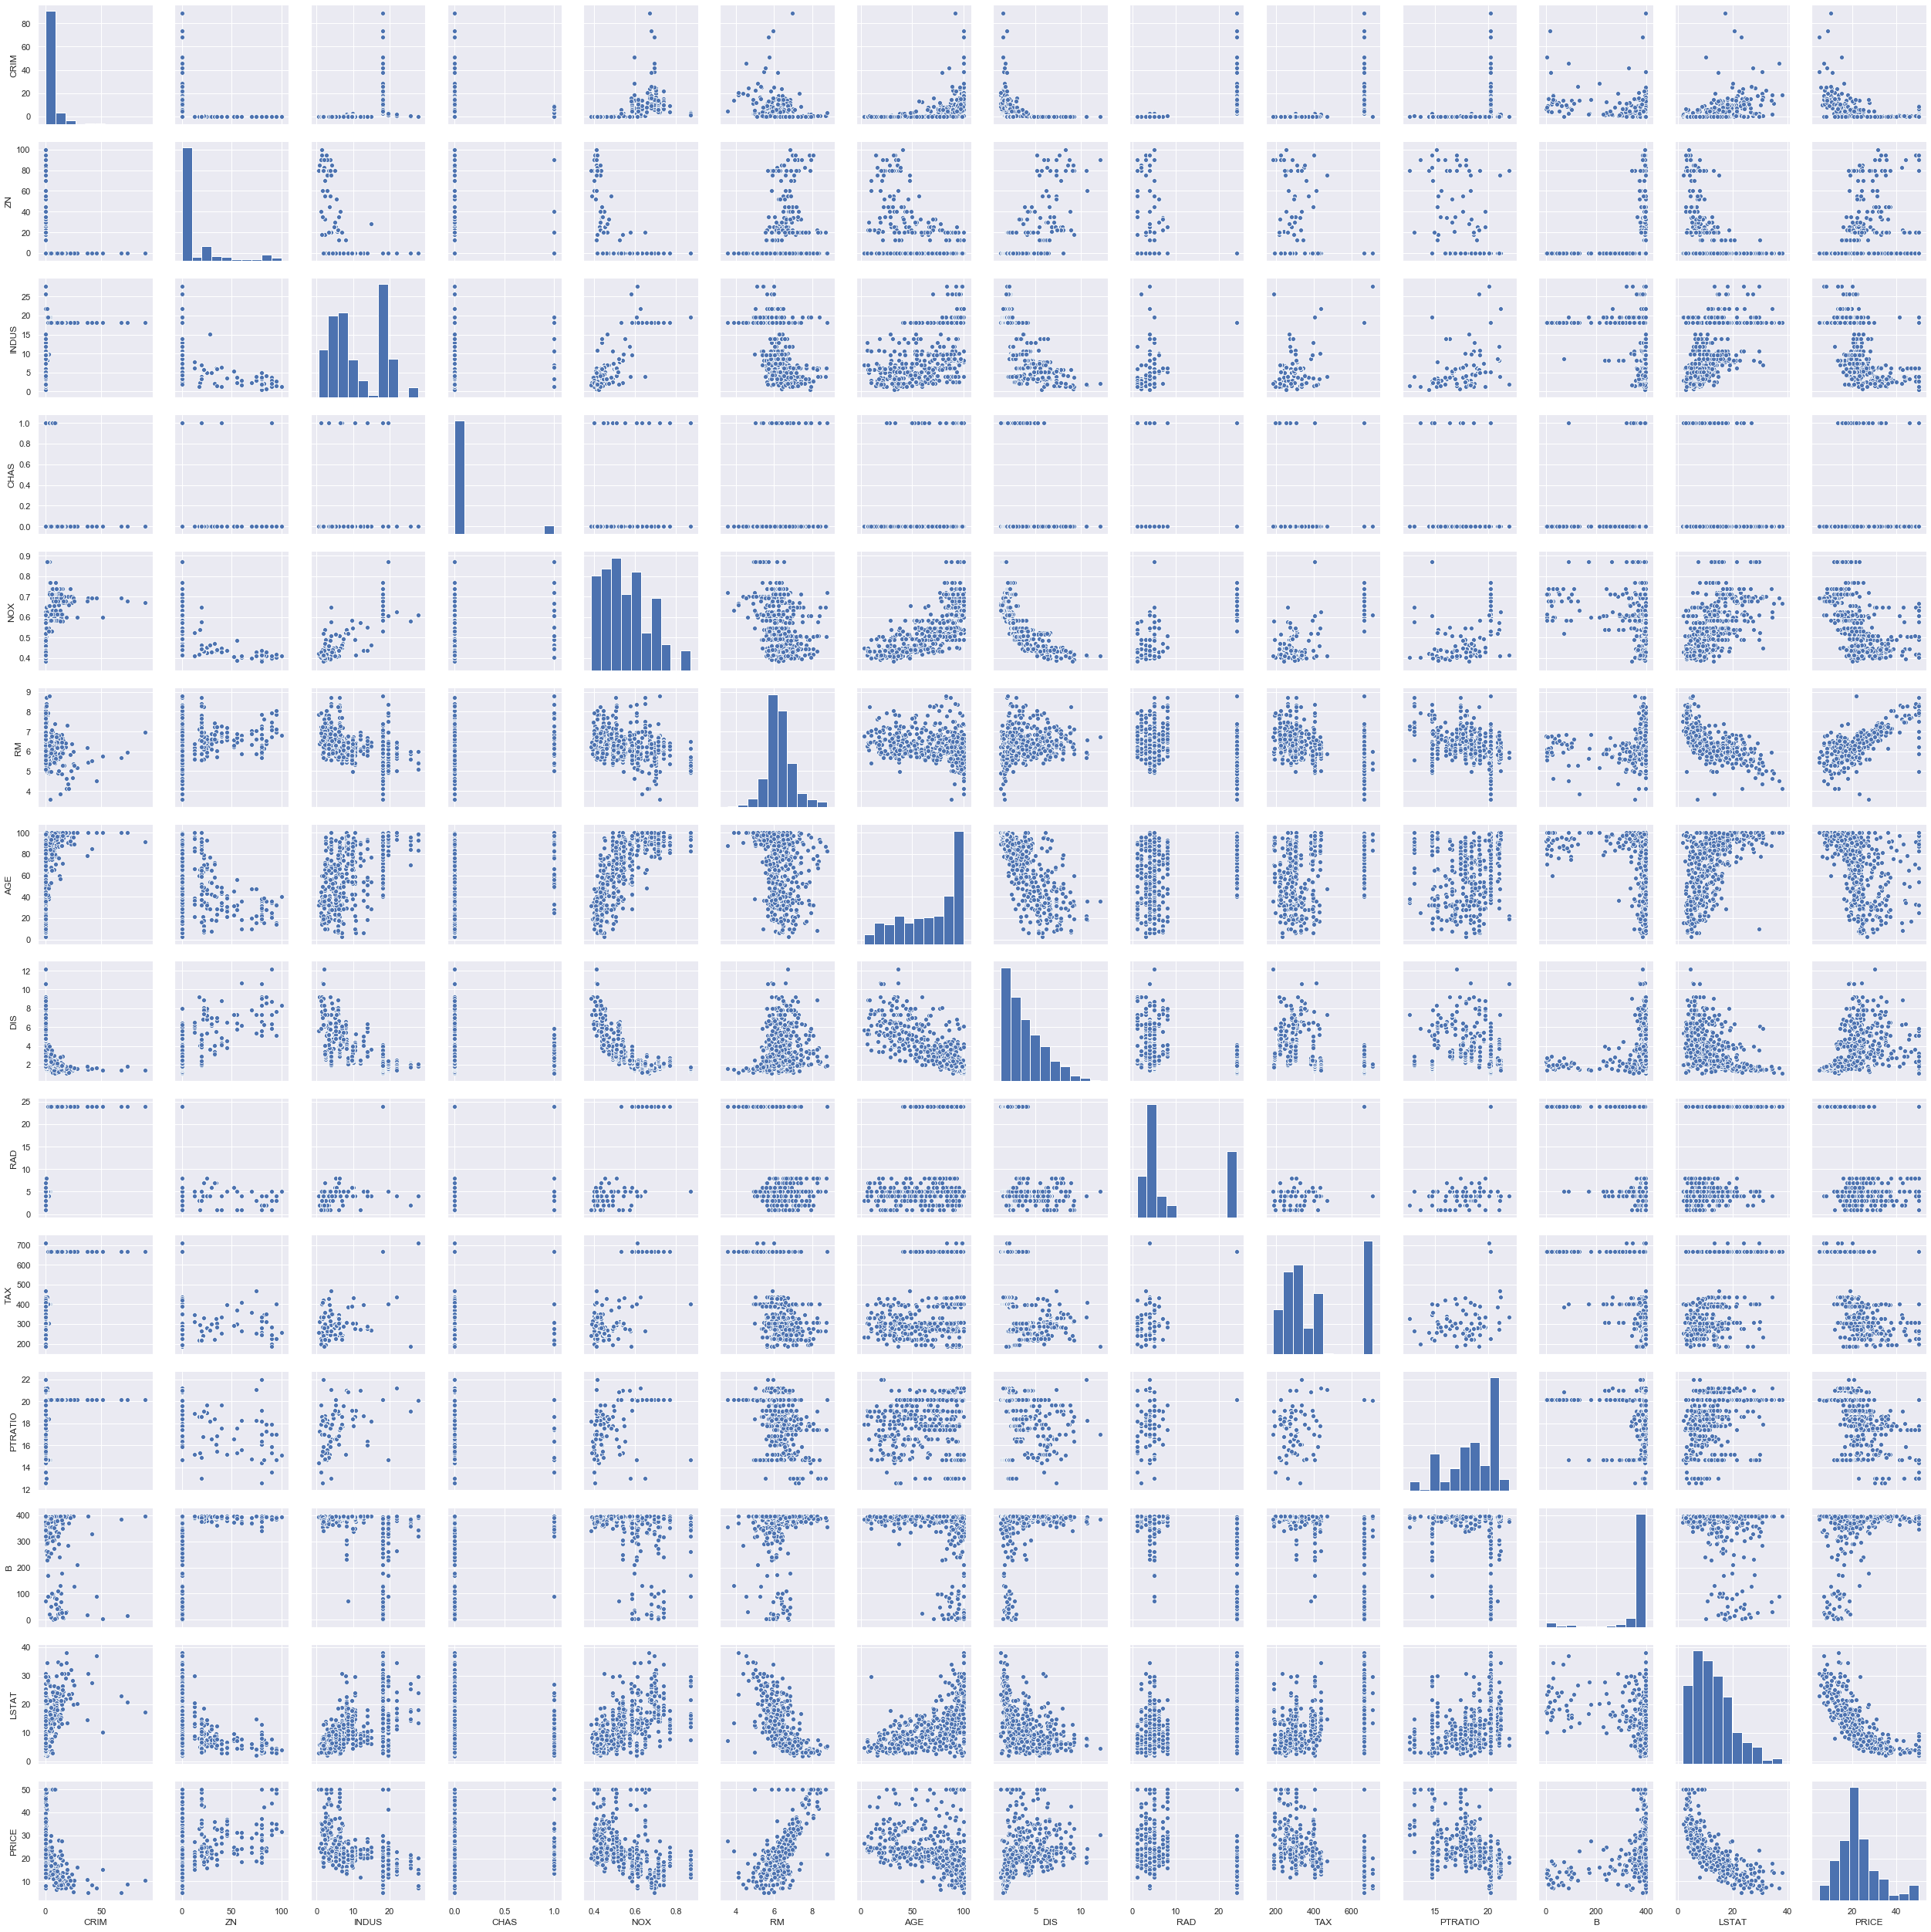

In [63]:
sns.pairplot(df)

The bottom left triangle portion of the matrix is actually the same and the top right portion of the matrix, with the axes flipped. The diagonal row is simply a histogram of each variable and number of occurrences.

- It’s already incredibly telling to me that there’s a positive correlation between PRICE and RM, negative correlation between PRICE and LSTAT

- From this, it is seen that LSTAT and RM show strong correlation with PRICE

- CRIM is heavily skewed to the left, showing a negative impact on price

- AGE seems evenly distributed, with more to the right

- PTRATIO and NOX, seem more more ebenly distributed

Scatter Plots of Relationships with the individual variables

Stronger predictors will have small, tight distributions of data around the line of best fit estimated by the plot.

Text(0.5, 1.0, 'Relationship - CRIM and Price')

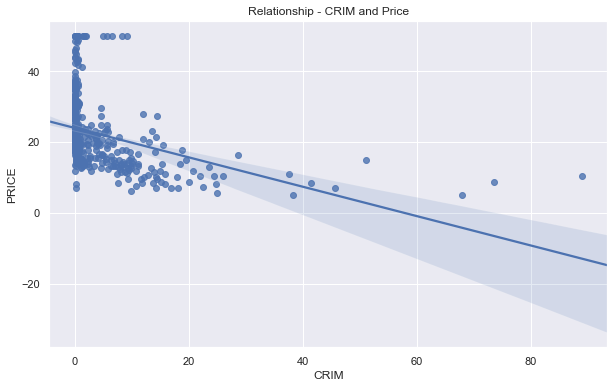

In [64]:
sns.regplot(y="PRICE", x="CRIM", data=df, fit_reg = True)
pl.title("Relationship - CRIM and Price")

As the house prices increase, CRIM decreases, there are though noticably few outliers present

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analysis.

Text(0.5, 1.0, 'Relationship - PTRATIO and Price')

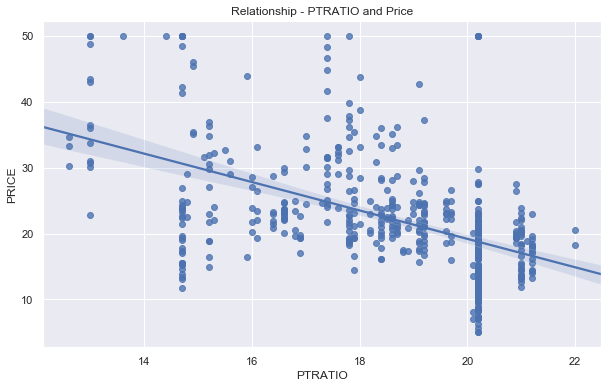

In [65]:
sns.regplot(y="PRICE", x="PTRATIO", data=df, fit_reg = True)
pl.title("Relationship - PTRATIO and Price")

This plot is showing a lot of outliers, as when the number of student ratio to teacher increases , the house price decreases

Text(0.5, 1.0, 'Relationship - NOX and Price')

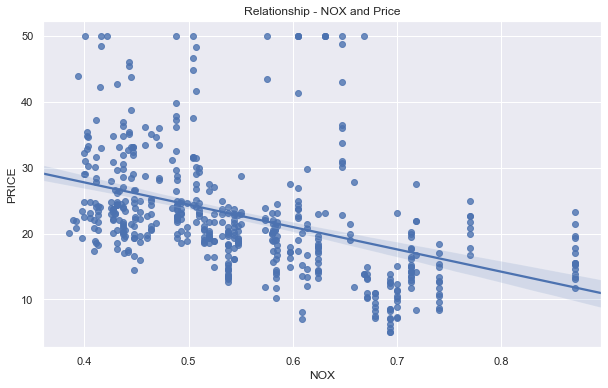

In [66]:
sns.regplot(y="PRICE", x="NOX", data=df, fit_reg = True)
pl.title("Relationship - NOX and Price")

The price value of the houses steadily increases as the nox levels decrease, I do notice though there are lots of data points spread around, Stronger predictors will have small, tight distributions of data around the line of best fit estimated by the plot, not in this case.

Text(0.5, 1.0, 'Relationship - LSTAT and Price')

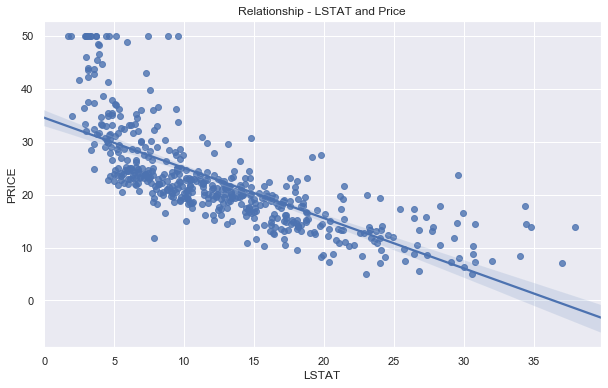

In [67]:
sns.regplot(y="PRICE", x="LSTAT", data=df, fit_reg = True)
pl.title("Relationship - LSTAT and Price")

We can see in this plot, there is a tight distributions of data around the line of best fit estimated by the plot, making this a strong predicator of price.

Text(0.5, 1.0, 'Relationship - AGE and Price')

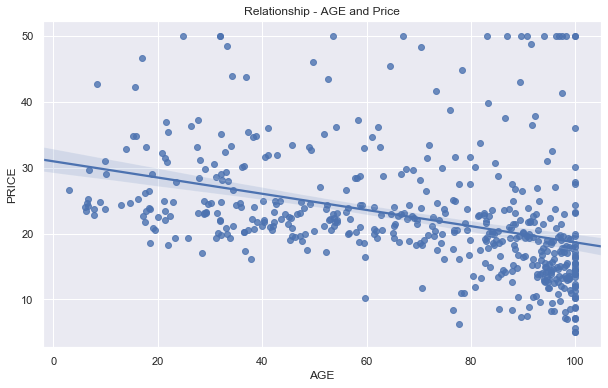

In [68]:
sns.regplot(y="PRICE", x="AGE", data=df, fit_reg = True)
pl.title("Relationship - AGE and Price")

Heavily skewed in the bottom right , indicating the older the property the lessor of value, there are present also quite a varied scatter of data points, not particularly strong indicator of price.

Text(0.5, 1.0, 'Relationship - RM and Price')

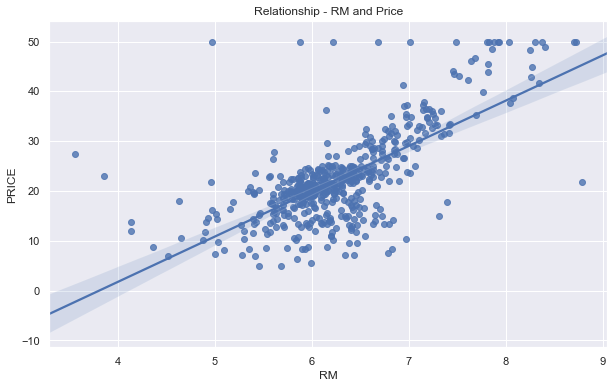

In [69]:
sns.regplot(y="PRICE", x="RM", data=df, fit_reg = True)
pl.title("Relationship - RM and Price")

Basically the more rooms, the higher the price, with a tight distribution of data around best fit

## I deliberately left out the below variable , as I think this variable selection is quite dated.

- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

### Charles River Houses

Inferential statistics

Inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. 

Explain  and  discuss  your  findings  withinthe  notebook.

Included in the Boston House Price Dataset , there is a variable called CHAS

CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

An input of 1, means that the house is located beside the Charles River

An input of 0, alternatively means that the house is not located beside the Charles River 

The following Analysis will generate the difference between the average price of either house type

First lets look at the data in both cases:


In [131]:
df.loc[df.CHAS == 1].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [130]:
df.loc[df.CHAS == 0].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [133]:
df.loc[df.CHAS == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09,20.0
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7


In [134]:
df.loc[df.CHAS == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [70]:
import pandas as pd
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [71]:
df.CHAS
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [72]:
# we are missing one column MEDV , which I will rename PRICE
df['PRICE'] = boston['target']
# lets have a look at the df again
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
df.pivot(columns='CHAS', values='PRICE').describe()

CHAS,0.0,1.0
count,471.000000,35.000000
mean,22.093843,28.440000
std,8.831362,11.816643
min,5.000000,13.400000
25%,16.600000,21.100000
50%,20.900000,23.300000
75%,24.800000,33.150000
max,50.000000,50.000000


Lets investigate the relationship between our other chosen variables

In [74]:
df.pivot(columns='CHAS', values='CRIM').describe()

CHAS,0.0,1.0
count,471.000000,35.000000
mean,3.744447,1.851670
std,8.876818,2.494072
min,0.006320,0.015010
25%,0.079640,0.125060
50%,0.245220,0.447910
75%,3.695030,3.397665
max,88.976200,8.982960


In [75]:
df.pivot(columns='CHAS', values='LSTAT').describe()

CHAS,0.0,1.0
count,471.000000,35.000000
mean,12.757941,11.241714
std,7.169271,6.686651
min,1.730000,1.920000
25%,7.160000,5.395000
50%,11.380000,10.500000
75%,17.095000,15.070000
max,37.970000,26.820000


In [76]:
df.pivot(columns='CHAS', values='AGE').describe()

CHAS,0.0,1.0
count,471.000000,35.00000
mean,67.911677,77.50000
std,28.458924,22.02134
min,2.900000,24.80000
25%,42.500000,60.30000
50%,76.500000,88.50000
75%,94.100000,93.20000
max,100.000000,100.00000


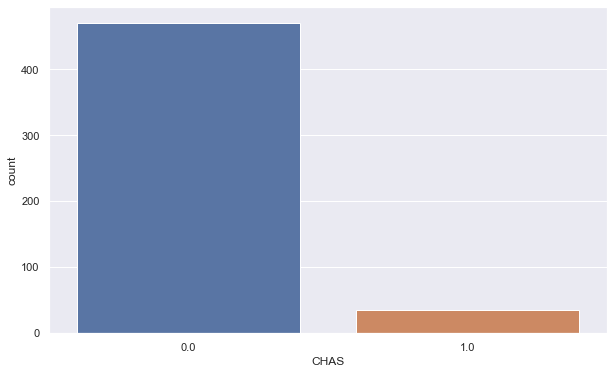

In [77]:
sns.countplot(x='CHAS', data=df)

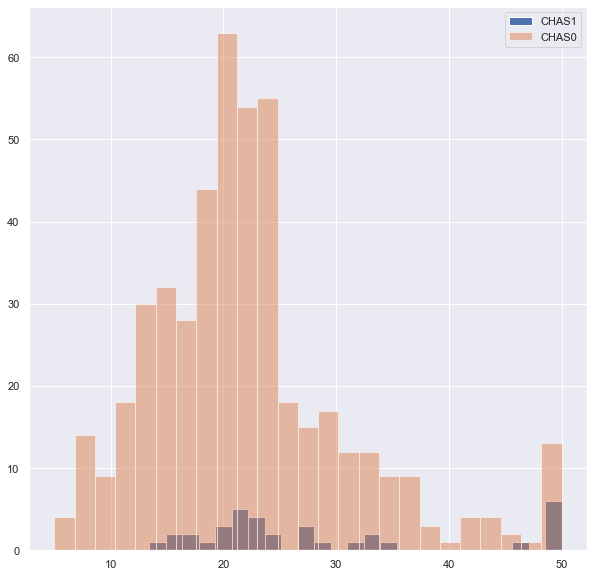

In [80]:
CHAS1 = df[df['CHAS'] == 1.0]['PRICE']
CHAS0 = df[df['CHAS'] == 0.0]['PRICE']


pl.hist(CHAS1, bins=25, label='CHAS1')
pl.hist(CHAS0, bins= 25, alpha=0.5, label='CHAS0')

pl.legend()
pl.show()

In [81]:
import scipy.stats as ss

In [82]:
ss.ttest_ind(CHAS1, CHAS0)
# CHAS1 beside the river, and CHAS0, not beside the river

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The *t test* is a measurement of whether the average (expected) value will differ significantly across the samples provided. A large p-value (greater than 0.05 or 0.1) then we cannot reject the null hypothesis. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages 6
WE have a clear statistically significance as per above , so therefore we have to reject the null hypothesis of equal avergages using all the data. 

In [83]:
stats.f_oneway(CHAS1, CHAS0)

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

An *ANOVA test* is a little more robust that a simple t-test so looking at the results

An ANOVA test is a way to find out if survey or experiment results are significant. In other words, they help you to figure out if you need to reject the null hypothesis or accept the alternate hypothesis. Basically, you're testing groups to see if there's a difference between them.

The above F-statistic of 15.97 suggests the between-groups variance is nearly 16x the within-group variance. Now we know the ratio of our variances doesn’t equal one, and the null hypothesis of equal mean values is rejected due to the p value being less than 0.05.

Text(0.5, 1.0, 'Relationship - CHAS and Price')

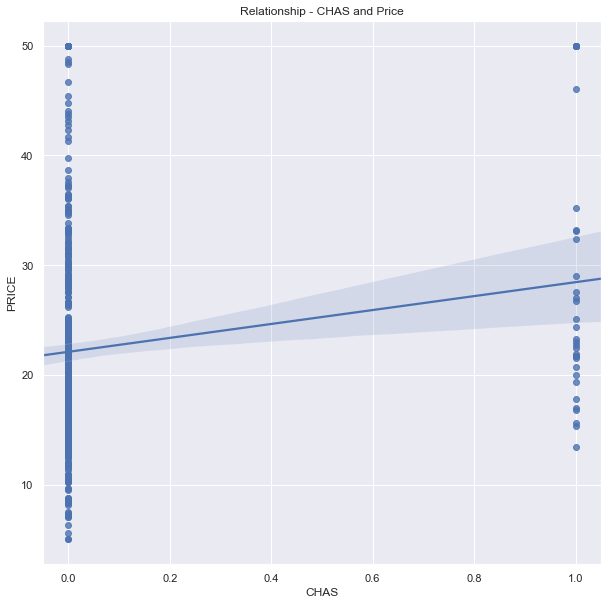

In [84]:
sns.regplot(y="PRICE", x="CHAS", data=df, fit_reg = True)
pl.title("Relationship - CHAS and Price")

Text(0.5, 1.0, 'Relationship - CHAS and AGE')

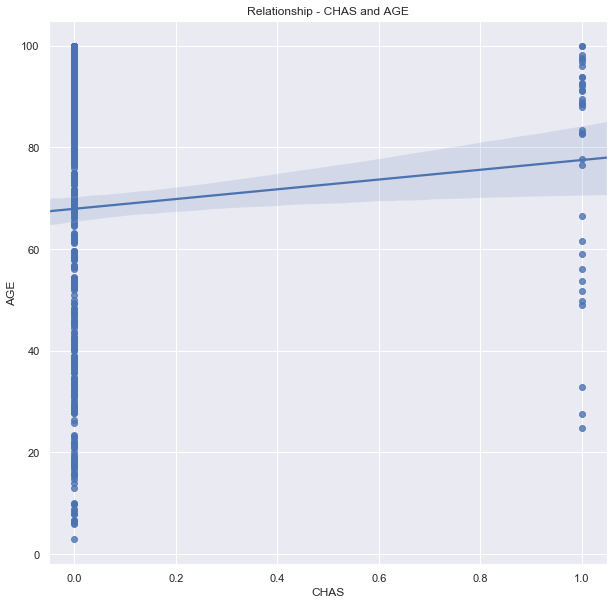

In [88]:
sns.regplot(y="AGE", x="CHAS", data=df, fit_reg = True)
pl.title("Relationship - CHAS and AGE")

Text(0.5, 1.0, 'Relationship - CHAS and RM')

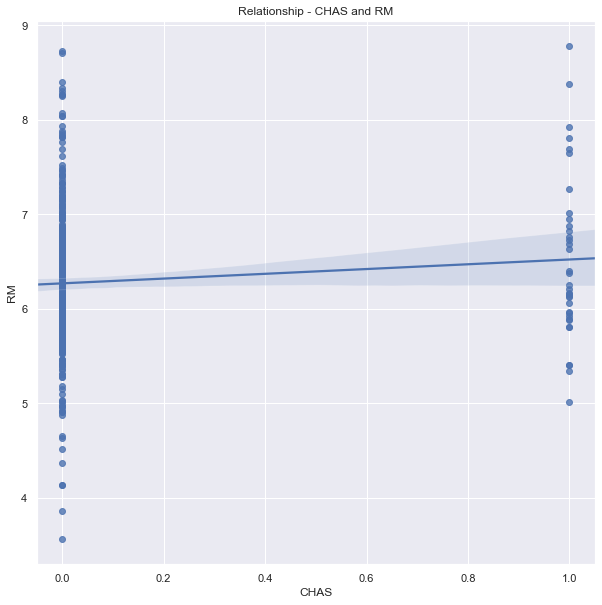

In [87]:
sns.regplot(y="RM", x="CHAS", data=df, fit_reg = True)
pl.title("Relationship - CHAS and RM")

Text(0.5, 1.0, 'Relationship - CHAS and LSTAT')

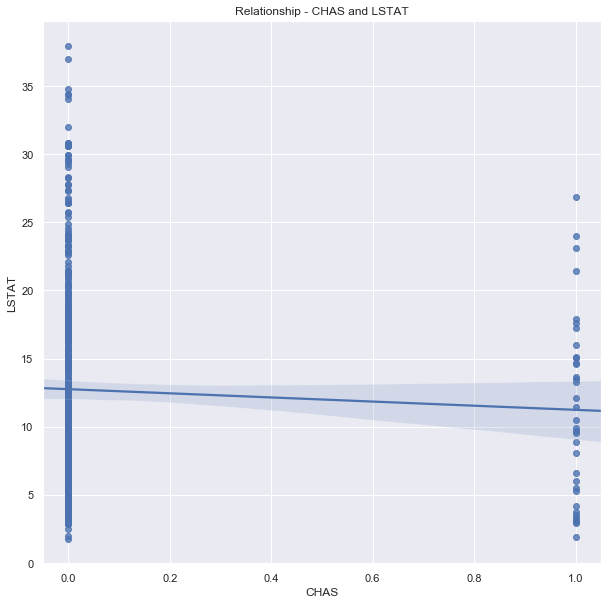

In [86]:
sns.regplot(y="LSTAT", x="CHAS", data=df, fit_reg = True)
pl.title("Relationship - CHAS and LSTAT")

In [85]:
df.pivot(columns='CHAS', values='AGE').describe()

CHAS,0.0,1.0
count,471.000000,35.00000
mean,67.911677,77.50000
std,28.458924,22.02134
min,2.900000,24.80000
25%,42.500000,60.30000
50%,76.500000,88.50000
75%,94.100000,93.20000
max,100.000000,100.00000


Use inferentialstatistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t.  You should explain  and  discuss  your  findings  within  the  notebook. 

As presented below, out of 506 houses, 471 of these houses are not beside the Charles River,leaving the remainder 35 of which are beside the Charles River.

Ther was not a lot evenly distributed data , to posittively concur the reasoning behind a difference in price.

The min value was where the signficant differnce lay, as per my findings perhaps this was the fact that older houses seem to be of less value located beside the River.

In [89]:
df.pivot(columns='CHAS', values='PRICE').describe()

CHAS,0.0,1.0
count,471.000000,35.000000
mean,22.093843,28.440000
std,8.831362,11.816643
min,5.000000,13.400000
25%,16.600000,21.100000
50%,20.900000,23.300000
75%,24.800000,33.150000
max,50.000000,50.000000


### Use keras to create a neural networkthat can predict the median house price based on the other variables in the dataset

You are free to interpret this as you wish — for example, you may use all the othervariables, or select a subset


### From the earlier findings , the following variables have shown a strong relationship with the price, and can be used as price predicators.
### These are the variables that stood out for me, which have the most effect on house prices 
### This is the following sub-set I will use t predict the House Price
- LSTAT % lower status of the population
- PTRATIO pupil-teacher ratio by town
- RAD index of accessibility to radial highways
- CRIM per capita crime rate per town
- AGE proportion of owner-occupied units built priorto 1940
- RM average number of rooms per dwelling

RAD is high when prices are low, but only two house values are high when RAD is extremely low, this may be due to the selction I have made, so I may not include this variable in further analysis and not include this variable in my subset.

## Scaling the data and building a model

In [95]:
import keras as ks

In [97]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [98]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [99]:
# we are missing one column MEDV , which I will rename PRICE
df['PRICE'] = boston['target']
# lets have a look at the df again
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [100]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [101]:
# Divide the dataset into inputs and outputs
inputs_no = df[['LSTAT', 'RM', 'CRIM', 'AGE','NOX', 'PTRATIO']]
outputs_no = df['PRICE']
# Build the neural network
model_no = Sequential()
model_no.add(Dense(250, input_dim=inputs_no.shape[1], activation='relu')) # Hidden 1
model_no.add(Dense(50, activation='relu')) # Hidden 2
model_no.add(Dense(50, activation='elu')) # Hidden 2
model_no.add(Dense(50, activation='selu')) # Hidden 2
model_no.add(Dense(1)) # Output
model_no.compile(loss='mean_squared_error', optimizer='adam')
model_no.fit(inputs_no,outputs_no,verbose=2,epochs=1000)

#model_all.add(Dense(250, input_dim=inputs_all.shape[1], activation='relu')) # Hidden 1
#model_all.add(Dense(50, activation='linear')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(50, activation='relu')) # Hidden 2
#model_all.add(Dense(1)) # Output
#model_all.compile(loss='mean_squared_error', optimizer='adam')
#model_all.fit(inputs_all,outputs_all,verbose=2,epochs=500)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
506/506 - 6s - loss: 324.8877
Epoch 2/1000
506/506 - 0s - loss: 152.0163
Epoch 3/1000
506/506 - 0s - loss: 107.6549
Epoch 4/1000
506/506 - 0s - loss: 73.6928
Epoch 5/1000
506/506 - 0s - loss: 49.4082
Epoch 6/1000
506/506 - 0s - loss: 43.3929
Epoch 7/1000
506/506 - 0s - loss: 40.4498
Epoch 8/1000
506/506 - 0s - loss: 37.0434
Epoch 9/1000
506/506 - 0s - loss: 34.0534
Epoch 10/1000
506/506 - 0s - loss: 30.9529
Epoch 11/1000
506/506 - 0s - loss: 30.5554
Epoch 12/1000
506/506 - 0s - loss: 28.3844
Epoch 13/1000
506/506 - 0s - loss: 28.0817
Epoch 14/1000
506/506 - 0s - loss: 26.9715
Epoch 15/1000
506/506 - 0s - loss: 25.2498
Epoch 16/1000
506/506 - 0s - loss: 24.8404
Epoch 17/1000
506/506 - 0s - loss: 22.4307
Epoch 18/1000
506/506 - 0s - loss: 25.1682
Epoch 19/1000
506/50

506/506 - 0s - loss: 9.4369
Epoch 175/1000
506/506 - 0s - loss: 9.7494
Epoch 176/1000
506/506 - 0s - loss: 9.7495
Epoch 177/1000
506/506 - 0s - loss: 10.0739
Epoch 178/1000
506/506 - 0s - loss: 10.2549
Epoch 179/1000
506/506 - 0s - loss: 9.5908
Epoch 180/1000
506/506 - 0s - loss: 10.0622
Epoch 181/1000
506/506 - 0s - loss: 10.6883
Epoch 182/1000
506/506 - 0s - loss: 9.4413
Epoch 183/1000
506/506 - 0s - loss: 9.0367
Epoch 184/1000
506/506 - 0s - loss: 9.5813
Epoch 185/1000
506/506 - 0s - loss: 9.0756
Epoch 186/1000
506/506 - 0s - loss: 9.9359
Epoch 187/1000
506/506 - 0s - loss: 11.3759
Epoch 188/1000
506/506 - 0s - loss: 9.1763
Epoch 189/1000
506/506 - 0s - loss: 9.2915
Epoch 190/1000
506/506 - 0s - loss: 8.9984
Epoch 191/1000
506/506 - 0s - loss: 10.1104
Epoch 192/1000
506/506 - 0s - loss: 9.6077
Epoch 193/1000
506/506 - 0s - loss: 8.9154
Epoch 194/1000
506/506 - 0s - loss: 8.7127
Epoch 195/1000
506/506 - 0s - loss: 10.1880
Epoch 196/1000
506/506 - 0s - loss: 9.5890
Epoch 197/1000
506/

Epoch 365/1000
506/506 - 0s - loss: 7.4391
Epoch 366/1000
506/506 - 0s - loss: 6.7903
Epoch 367/1000
506/506 - 0s - loss: 6.8770
Epoch 368/1000
506/506 - 0s - loss: 6.7053
Epoch 369/1000
506/506 - 0s - loss: 6.9940
Epoch 370/1000
506/506 - 0s - loss: 7.2798
Epoch 371/1000
506/506 - 0s - loss: 7.3666
Epoch 372/1000
506/506 - 0s - loss: 7.1804
Epoch 373/1000
506/506 - 0s - loss: 7.8065
Epoch 374/1000
506/506 - 0s - loss: 7.2296
Epoch 375/1000
506/506 - 0s - loss: 7.0018
Epoch 376/1000
506/506 - 0s - loss: 7.9879
Epoch 377/1000
506/506 - 0s - loss: 7.3704
Epoch 378/1000
506/506 - 0s - loss: 7.5955
Epoch 379/1000
506/506 - 0s - loss: 6.7109
Epoch 380/1000
506/506 - 0s - loss: 6.8861
Epoch 381/1000
506/506 - 0s - loss: 7.6006
Epoch 382/1000
506/506 - 0s - loss: 7.0669
Epoch 383/1000
506/506 - 0s - loss: 6.8390
Epoch 384/1000
506/506 - 0s - loss: 6.6712
Epoch 385/1000
506/506 - 0s - loss: 7.1714
Epoch 386/1000
506/506 - 0s - loss: 7.1140
Epoch 387/1000
506/506 - 0s - loss: 7.3755
Epoch 388/1

Epoch 556/1000
506/506 - 0s - loss: 5.9046
Epoch 557/1000
506/506 - 0s - loss: 5.9725
Epoch 558/1000
506/506 - 0s - loss: 6.8210
Epoch 559/1000
506/506 - 0s - loss: 6.6314
Epoch 560/1000
506/506 - 0s - loss: 6.2864
Epoch 561/1000
506/506 - 0s - loss: 7.0229
Epoch 562/1000
506/506 - 0s - loss: 5.6014
Epoch 563/1000
506/506 - 0s - loss: 5.4962
Epoch 564/1000
506/506 - 0s - loss: 5.5384
Epoch 565/1000
506/506 - 0s - loss: 6.3629
Epoch 566/1000
506/506 - 0s - loss: 6.2174
Epoch 567/1000
506/506 - 0s - loss: 5.6565
Epoch 568/1000
506/506 - 0s - loss: 5.5756
Epoch 569/1000
506/506 - 0s - loss: 5.2506
Epoch 570/1000
506/506 - 0s - loss: 5.9648
Epoch 571/1000
506/506 - 0s - loss: 6.8754
Epoch 572/1000
506/506 - 0s - loss: 5.8504
Epoch 573/1000
506/506 - 0s - loss: 5.5261
Epoch 574/1000
506/506 - 0s - loss: 6.2170
Epoch 575/1000
506/506 - 0s - loss: 5.7352
Epoch 576/1000
506/506 - 0s - loss: 5.6549
Epoch 577/1000
506/506 - 0s - loss: 6.6255
Epoch 578/1000
506/506 - 0s - loss: 6.0836
Epoch 579/1

Epoch 747/1000
506/506 - 0s - loss: 4.8300
Epoch 748/1000
506/506 - 0s - loss: 4.4600
Epoch 749/1000
506/506 - 0s - loss: 4.3640
Epoch 750/1000
506/506 - 0s - loss: 5.5259
Epoch 751/1000
506/506 - 0s - loss: 5.4742
Epoch 752/1000
506/506 - 0s - loss: 5.3935
Epoch 753/1000
506/506 - 0s - loss: 4.8128
Epoch 754/1000
506/506 - 0s - loss: 5.0926
Epoch 755/1000
506/506 - 0s - loss: 5.3163
Epoch 756/1000
506/506 - 0s - loss: 4.7990
Epoch 757/1000
506/506 - 0s - loss: 4.5607
Epoch 758/1000
506/506 - 0s - loss: 4.5348
Epoch 759/1000
506/506 - 0s - loss: 4.8654
Epoch 760/1000
506/506 - 0s - loss: 4.7370
Epoch 761/1000
506/506 - 0s - loss: 5.2597
Epoch 762/1000
506/506 - 0s - loss: 4.7405
Epoch 763/1000
506/506 - 0s - loss: 4.7759
Epoch 764/1000
506/506 - 0s - loss: 4.4073
Epoch 765/1000
506/506 - 0s - loss: 4.4067
Epoch 766/1000
506/506 - 0s - loss: 4.4599
Epoch 767/1000
506/506 - 0s - loss: 4.4440
Epoch 768/1000
506/506 - 0s - loss: 4.5763
Epoch 769/1000
506/506 - 0s - loss: 4.6582
Epoch 770/1

Epoch 938/1000
506/506 - 0s - loss: 3.9121
Epoch 939/1000
506/506 - 0s - loss: 3.5812
Epoch 940/1000
506/506 - 0s - loss: 3.5672
Epoch 941/1000
506/506 - 0s - loss: 3.4893
Epoch 942/1000
506/506 - 0s - loss: 3.8404
Epoch 943/1000
506/506 - 0s - loss: 3.9081
Epoch 944/1000
506/506 - 0s - loss: 4.1765
Epoch 945/1000
506/506 - 0s - loss: 4.3289
Epoch 946/1000
506/506 - 0s - loss: 3.6377
Epoch 947/1000
506/506 - 0s - loss: 3.7103
Epoch 948/1000
506/506 - 0s - loss: 4.2289
Epoch 949/1000
506/506 - 0s - loss: 3.8967
Epoch 950/1000
506/506 - 0s - loss: 3.2913
Epoch 951/1000
506/506 - 0s - loss: 3.5988
Epoch 952/1000
506/506 - 0s - loss: 3.4573
Epoch 953/1000
506/506 - 0s - loss: 3.5690
Epoch 954/1000
506/506 - 0s - loss: 3.8295
Epoch 955/1000
506/506 - 0s - loss: 3.7904
Epoch 956/1000
506/506 - 0s - loss: 4.1074
Epoch 957/1000
506/506 - 0s - loss: 4.3848
Epoch 958/1000
506/506 - 0s - loss: 3.6334
Epoch 959/1000
506/506 - 0s - loss: 4.2780
Epoch 960/1000
506/506 - 0s - loss: 3.9377
Epoch 961/1

In [102]:
pred_no = model_no.predict(inputs_no)
print("Shape: {}".format(pred_no.shape))
print(pred_no)

Shape: (506, 1)
[[28.23236  ]
 [23.021374 ]
 [36.078556 ]
 [33.594433 ]
 [37.867313 ]
 [27.500452 ]
 [21.118542 ]
 [26.154692 ]
 [16.565155 ]
 [18.115986 ]
 [17.52285  ]
 [22.366549 ]
 [21.008888 ]
 [20.259418 ]
 [17.951487 ]
 [19.379206 ]
 [23.722466 ]
 [17.622261 ]
 [20.161983 ]
 [18.236408 ]
 [14.153555 ]
 [18.520828 ]
 [15.530131 ]
 [16.22675  ]
 [17.965149 ]
 [15.431561 ]
 [18.192392 ]
 [16.267048 ]
 [20.16306  ]
 [20.929085 ]
 [14.279309 ]
 [17.521696 ]
 [13.277428 ]
 [15.258453 ]
 [14.786949 ]
 [22.058636 ]
 [19.804306 ]
 [20.405132 ]
 [23.818378 ]
 [30.79949  ]
 [36.0202   ]
 [27.934765 ]
 [25.366825 ]
 [25.609917 ]
 [22.33183  ]
 [21.602102 ]
 [18.924974 ]
 [19.709568 ]
 [14.726551 ]
 [20.768497 ]
 [18.958883 ]
 [19.966278 ]
 [25.60458  ]
 [21.872961 ]
 [20.175137 ]
 [37.126484 ]
 [25.987343 ]
 [33.86914  ]
 [23.241901 ]
 [19.878914 ]
 [18.966858 ]
 [20.214363 ]
 [25.251354 ]
 [24.899279 ]
 [29.524132 ]
 [26.065338 ]
 [18.30967  ]
 [21.76998  ]
 [18.30315  ]
 [22.455887 ]
 [24

In [103]:
# Measure RMSE error.  RMSE is common for regression.
score_no = np.sqrt(metrics.mean_squared_error(pred_no,outputs_no))
print(f"Final score (RMSE): {score_no}")

Final score (RMSE): 1.8511912790756178


In [148]:
# Sample predictions
for i in range(5):
    print(f"{i+1}. CRIM: {inputs_no['CRIM'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. CRIM: 0.00632, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. CRIM: 0.02731, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. CRIM: 0.02729, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. CRIM: 0.03237, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. CRIM: 0.06905, Actual PRICE: 36.2, predicted PRICE: [37.867313]


In [149]:
for i in range(5):
    print(f"{i+1}. PTRATIO: {inputs_no['PTRATIO'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. PTRATIO: 15.3, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. PTRATIO: 17.8, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. PTRATIO: 17.8, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. PTRATIO: 18.7, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. PTRATIO: 18.7, Actual PRICE: 36.2, predicted PRICE: [37.867313]


In [150]:
for i in range(5):
    print(f"{i+1}. NOX: {inputs_no['NOX'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. NOX: 0.538, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. NOX: 0.469, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. NOX: 0.469, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. NOX: 0.458, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. NOX: 0.458, Actual PRICE: 36.2, predicted PRICE: [37.867313]


In [151]:
for i in range(5):
    print(f"{i+1}. LSTAT: {inputs_no['LSTAT'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. LSTAT: 4.98, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. LSTAT: 9.14, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. LSTAT: 4.03, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. LSTAT: 2.94, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. LSTAT: 5.33, Actual PRICE: 36.2, predicted PRICE: [37.867313]


In [152]:
for i in range(5):
    print(f"{i+1}. AGE: {inputs_no['AGE'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. AGE: 65.2, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. AGE: 78.9, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. AGE: 61.1, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. AGE: 45.8, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. AGE: 54.2, Actual PRICE: 36.2, predicted PRICE: [37.867313]


In [153]:
for i in range(5):
    print(f"{i+1}. RM: {inputs_no['RM'][i]}, Actual PRICE: {outputs_no[i]}, predicted PRICE: {pred_no[i]}")

1. RM: 6.575, Actual PRICE: 24.0, predicted PRICE: [28.23236]
2. RM: 6.421, Actual PRICE: 21.6, predicted PRICE: [23.021374]
3. RM: 7.185, Actual PRICE: 34.7, predicted PRICE: [36.078556]
4. RM: 6.998, Actual PRICE: 33.4, predicted PRICE: [33.594433]
5. RM: 7.147, Actual PRICE: 36.2, predicted PRICE: [37.867313]


### With Outliers

In [154]:
# Divide the dataset into inputs and outputs
inputs_all = df[['LSTAT', 'RM', 'CRIM', 'AGE','NOX', 'PTRATIO']]
outputs_all = df['PRICE']
# Build the neural network
model_all = Sequential()
model_all.add(Dense(250, input_dim=inputs_all.shape[1], activation='relu')) 
model_all.add(Dense(50, activation='linear')) 
model_all.add(Dense(50, activation='relu')) 
model_all.add(Dense(50, activation='relu')) 
model_all.add(Dense(50, activation='relu')) 
model_all.add(Dense(1)) # Output
model_all.compile(loss='mean_squared_error', optimizer='adam')
model_all.fit(inputs_all,outputs_all,verbose=2,epochs=500, batch_size=10)

Epoch 1/500
506/506 - 22s - loss: 166.0491
Epoch 2/500
506/506 - 1s - loss: 44.3401
Epoch 3/500
506/506 - 1s - loss: 37.1010
Epoch 4/500
506/506 - 1s - loss: 37.8434
Epoch 5/500
506/506 - 1s - loss: 30.0847
Epoch 6/500
506/506 - 1s - loss: 30.6706
Epoch 7/500
506/506 - 0s - loss: 24.8672
Epoch 8/500
506/506 - 1s - loss: 30.2806
Epoch 9/500
506/506 - 0s - loss: 32.5770
Epoch 10/500
506/506 - 0s - loss: 21.0864
Epoch 11/500
506/506 - 0s - loss: 24.1037
Epoch 12/500
506/506 - 0s - loss: 20.1784
Epoch 13/500
506/506 - 0s - loss: 19.5972
Epoch 14/500
506/506 - 0s - loss: 19.0365
Epoch 15/500
506/506 - 0s - loss: 16.6543
Epoch 16/500
506/506 - 0s - loss: 19.7598
Epoch 17/500
506/506 - 0s - loss: 20.9570
Epoch 18/500
506/506 - 1s - loss: 16.9452
Epoch 19/500
506/506 - 1s - loss: 18.5866
Epoch 20/500
506/506 - 1s - loss: 21.3423
Epoch 21/500
506/506 - 1s - loss: 16.2966
Epoch 22/500
506/506 - 0s - loss: 16.6398
Epoch 23/500
506/506 - 1s - loss: 16.1141
Epoch 24/500
506/506 - 0s - loss: 18.7013

Epoch 195/500
506/506 - 1s - loss: 8.1828
Epoch 196/500
506/506 - 0s - loss: 8.8363
Epoch 197/500
506/506 - 0s - loss: 8.5761
Epoch 198/500
506/506 - 0s - loss: 10.7221
Epoch 199/500
506/506 - 0s - loss: 9.3127
Epoch 200/500
506/506 - 0s - loss: 9.1156
Epoch 201/500
506/506 - 0s - loss: 8.7718
Epoch 202/500
506/506 - 0s - loss: 8.9262
Epoch 203/500
506/506 - 0s - loss: 10.8143
Epoch 204/500
506/506 - 0s - loss: 9.4682
Epoch 205/500
506/506 - 0s - loss: 8.0597
Epoch 206/500
506/506 - 0s - loss: 8.6129
Epoch 207/500
506/506 - 0s - loss: 8.1960
Epoch 208/500
506/506 - 0s - loss: 9.6864
Epoch 209/500
506/506 - 0s - loss: 7.9980
Epoch 210/500
506/506 - 0s - loss: 9.2036
Epoch 211/500
506/506 - 0s - loss: 8.3558
Epoch 212/500
506/506 - 0s - loss: 9.2006
Epoch 213/500
506/506 - 0s - loss: 9.1339
Epoch 214/500
506/506 - 1s - loss: 8.6278
Epoch 215/500
506/506 - 0s - loss: 8.2407
Epoch 216/500
506/506 - 0s - loss: 8.1284
Epoch 217/500
506/506 - 0s - loss: 8.3076
Epoch 218/500
506/506 - 0s - los

Epoch 390/500
506/506 - 1s - loss: 9.5161
Epoch 391/500
506/506 - 1s - loss: 9.8739
Epoch 392/500
506/506 - 1s - loss: 5.9456
Epoch 393/500
506/506 - 1s - loss: 7.3870
Epoch 394/500
506/506 - 1s - loss: 5.7350
Epoch 395/500
506/506 - 1s - loss: 5.6101
Epoch 396/500
506/506 - 1s - loss: 5.7263
Epoch 397/500
506/506 - 0s - loss: 6.4017
Epoch 398/500
506/506 - 0s - loss: 6.2871
Epoch 399/500
506/506 - 0s - loss: 5.9673
Epoch 400/500
506/506 - 1s - loss: 6.2790
Epoch 401/500
506/506 - 1s - loss: 6.1997
Epoch 402/500
506/506 - 1s - loss: 6.1886
Epoch 403/500
506/506 - 1s - loss: 7.1127
Epoch 404/500
506/506 - 1s - loss: 6.4271
Epoch 405/500
506/506 - 1s - loss: 7.2645
Epoch 406/500
506/506 - 1s - loss: 5.9930
Epoch 407/500
506/506 - 1s - loss: 6.3438
Epoch 408/500
506/506 - 1s - loss: 5.9289
Epoch 409/500
506/506 - 1s - loss: 7.7315
Epoch 410/500
506/506 - 1s - loss: 6.5462
Epoch 411/500
506/506 - 1s - loss: 5.5561
Epoch 412/500
506/506 - 1s - loss: 6.7906
Epoch 413/500
506/506 - 1s - loss:

In [106]:
pred_all = model_all.predict(inputs_no)
print("Shape: {}".format(pred_all.shape))
print(pred_all)

Shape: (506, 1)
[[29.765608 ]
 [24.284664 ]
 [35.991474 ]
 [34.325092 ]
 [36.606243 ]
 [27.232689 ]
 [21.056    ]
 [20.4799   ]
 [15.533547 ]
 [18.143637 ]
 [19.140736 ]
 [21.452793 ]
 [22.186443 ]
 [21.513186 ]
 [16.901352 ]
 [21.07912  ]
 [25.216862 ]
 [17.723824 ]
 [20.390587 ]
 [18.040792 ]
 [12.098854 ]
 [17.220654 ]
 [16.601784 ]
 [14.355328 ]
 [17.006645 ]
 [15.556325 ]
 [16.960506 ]
 [17.043873 ]
 [19.375153 ]
 [22.06361  ]
 [12.1514225]
 [17.745941 ]
 [12.703907 ]
 [14.844738 ]
 [14.434658 ]
 [20.98113  ]
 [20.549103 ]
 [20.76142  ]
 [22.619066 ]
 [31.165485 ]
 [35.594486 ]
 [28.450365 ]
 [25.497171 ]
 [25.873093 ]
 [23.40131  ]
 [21.33869  ]
 [21.137455 ]
 [18.533413 ]
 [13.353564 ]
 [20.417198 ]
 [21.765692 ]
 [24.03396  ]
 [28.134907 ]
 [22.615547 ]
 [19.756956 ]
 [36.454716 ]
 [27.209734 ]
 [39.740276 ]
 [23.460085 ]
 [20.659275 ]
 [20.150278 ]
 [18.410069 ]
 [23.926273 ]
 [26.475296 ]
 [28.643826 ]
 [28.3602   ]
 [20.19478  ]
 [22.207642 ]
 [20.082855 ]
 [22.090796 ]
 [26

In [107]:
# Measure RMSE error.  
score_all = np.sqrt(metrics.mean_squared_error(pred_all,outputs_all))
print(f"Final score (RMSE): {score_all}")

Final score (RMSE): 2.5572820599807917


In [146]:
for i in range(506):
    print(f"{i+1}. NOX: {inputs_all['NOX'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. NOX: 0.538,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. NOX: 0.469,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. NOX: 0.469,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. NOX: 0.458,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. NOX: 0.458,  Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. NOX: 0.458,  Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. NOX: 0.524,  Actual PRICE: 22.9, predicted PRICE: [21.056]
8. NOX: 0.524,  Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. NOX: 0.524,  Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. NOX: 0.524,  Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. NOX: 0.524,  Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. NOX: 0.524,  Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. NOX: 0.524,  Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. NOX: 0.538,  Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. NOX: 0.538,  Actual PRICE: 18.2, predicted PRICE: [16.901352]
16. NOX: 0.538,  Actual 

183. NOX: 0.488,  Actual PRICE: 37.9, predicted PRICE: [33.856953]
184. NOX: 0.488,  Actual PRICE: 32.5, predicted PRICE: [31.762802]
185. NOX: 0.488,  Actual PRICE: 26.4, predicted PRICE: [17.910736]
186. NOX: 0.488,  Actual PRICE: 29.6, predicted PRICE: [23.457336]
187. NOX: 0.488,  Actual PRICE: 50.0, predicted PRICE: [46.109177]
188. NOX: 0.437,  Actual PRICE: 32.0, predicted PRICE: [30.865664]
189. NOX: 0.437,  Actual PRICE: 29.8, predicted PRICE: [32.904736]
190. NOX: 0.437,  Actual PRICE: 34.9, predicted PRICE: [35.317265]
191. NOX: 0.437,  Actual PRICE: 37.0, predicted PRICE: [34.346027]
192. NOX: 0.437,  Actual PRICE: 30.5, predicted PRICE: [33.772503]
193. NOX: 0.437,  Actual PRICE: 36.4, predicted PRICE: [42.82769]
194. NOX: 0.401,  Actual PRICE: 31.1, predicted PRICE: [30.20019]
195. NOX: 0.401,  Actual PRICE: 29.1, predicted PRICE: [32.769173]
196. NOX: 0.422,  Actual PRICE: 50.0, predicted PRICE: [51.1981]
197. NOX: 0.404,  Actual PRICE: 33.3, predicted PRICE: [37.84022]


428. NOX: 0.679,  Actual PRICE: 10.9, predicted PRICE: [8.97368]
429. NOX: 0.679,  Actual PRICE: 11.0, predicted PRICE: [11.0149975]
430. NOX: 0.679,  Actual PRICE: 9.5, predicted PRICE: [10.625479]
431. NOX: 0.584,  Actual PRICE: 14.5, predicted PRICE: [14.126999]
432. NOX: 0.584,  Actual PRICE: 14.1, predicted PRICE: [14.52607]
433. NOX: 0.584,  Actual PRICE: 16.1, predicted PRICE: [19.513475]
434. NOX: 0.713,  Actual PRICE: 14.3, predicted PRICE: [17.140415]
435. NOX: 0.713,  Actual PRICE: 11.7, predicted PRICE: [14.475153]
436. NOX: 0.74,  Actual PRICE: 13.4, predicted PRICE: [11.802439]
437. NOX: 0.74,  Actual PRICE: 9.6, predicted PRICE: [12.325288]
438. NOX: 0.74,  Actual PRICE: 8.7, predicted PRICE: [7.890412]
439. NOX: 0.74,  Actual PRICE: 8.4, predicted PRICE: [7.8674793]
440. NOX: 0.74,  Actual PRICE: 12.8, predicted PRICE: [10.980083]
441. NOX: 0.74,  Actual PRICE: 10.5, predicted PRICE: [13.154606]
442. NOX: 0.74,  Actual PRICE: 17.1, predicted PRICE: [14.305837]
443. NOX:

In [145]:
for i in range(506):
    print(f"{i+1}. CRIM: {inputs_all['CRIM'][i]}, Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. CRIM: 0.00632, Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. CRIM: 0.02731, Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. CRIM: 0.02729, Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. CRIM: 0.03237, Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. CRIM: 0.06905, Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. CRIM: 0.02985, Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. CRIM: 0.08829, Actual PRICE: 22.9, predicted PRICE: [21.056]
8. CRIM: 0.14455, Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. CRIM: 0.21124, Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. CRIM: 0.17004, Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. CRIM: 0.22489, Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. CRIM: 0.11747, Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. CRIM: 0.09378, Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. CRIM: 0.62976, Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. CRIM: 0.63796, Actual PRICE: 18.2, predicted PRICE: [16.90

122. CRIM: 0.07165, Actual PRICE: 20.3, predicted PRICE: [19.057362]
123. CRIM: 0.09299, Actual PRICE: 20.5, predicted PRICE: [17.907707]
124. CRIM: 0.15038, Actual PRICE: 17.3, predicted PRICE: [17.040094]
125. CRIM: 0.09849, Actual PRICE: 18.8, predicted PRICE: [17.858952]
126. CRIM: 0.16902, Actual PRICE: 21.4, predicted PRICE: [18.785255]
127. CRIM: 0.38735, Actual PRICE: 15.7, predicted PRICE: [14.504525]
128. CRIM: 0.25915, Actual PRICE: 16.2, predicted PRICE: [17.157284]
129. CRIM: 0.32543, Actual PRICE: 18.0, predicted PRICE: [19.245056]
130. CRIM: 0.88125, Actual PRICE: 14.3, predicted PRICE: [15.08425]
131. CRIM: 0.34006, Actual PRICE: 19.2, predicted PRICE: [19.53238]
132. CRIM: 1.19294, Actual PRICE: 19.6, predicted PRICE: [18.090176]
133. CRIM: 0.59005, Actual PRICE: 23.0, predicted PRICE: [18.745642]
134. CRIM: 0.32982, Actual PRICE: 18.4, predicted PRICE: [17.670101]
135. CRIM: 0.97617, Actual PRICE: 15.6, predicted PRICE: [16.261986]
136. CRIM: 0.55778, Actual PRICE: 18

375. CRIM: 18.4982, Actual PRICE: 13.8, predicted PRICE: [11.399968]
376. CRIM: 19.6091, Actual PRICE: 15.0, predicted PRICE: [14.135437]
377. CRIM: 15.288, Actual PRICE: 13.9, predicted PRICE: [11.60545]
378. CRIM: 9.82349, Actual PRICE: 13.3, predicted PRICE: [13.960179]
379. CRIM: 23.6482, Actual PRICE: 13.1, predicted PRICE: [12.680354]
380. CRIM: 17.8667, Actual PRICE: 10.2, predicted PRICE: [12.055803]
381. CRIM: 88.9762, Actual PRICE: 10.4, predicted PRICE: [10.94169]
382. CRIM: 15.8744, Actual PRICE: 10.9, predicted PRICE: [13.256933]
383. CRIM: 9.18702, Actual PRICE: 11.3, predicted PRICE: [10.488091]
384. CRIM: 7.99248, Actual PRICE: 12.3, predicted PRICE: [12.157082]
385. CRIM: 20.0849, Actual PRICE: 8.8, predicted PRICE: [7.8650594]
386. CRIM: 16.8118, Actual PRICE: 7.2, predicted PRICE: [7.5242295]
387. CRIM: 24.3938, Actual PRICE: 10.5, predicted PRICE: [8.53306]
388. CRIM: 22.5971, Actual PRICE: 7.4, predicted PRICE: [7.735973]
389. CRIM: 14.3337, Actual PRICE: 10.2, pre

In [144]:
for i in range(506):
    print(f"{i+1}. PTRATIO: {inputs_all['PTRATIO'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. PTRATIO: 15.3,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. PTRATIO: 17.8,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. PTRATIO: 17.8,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. PTRATIO: 18.7,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. PTRATIO: 18.7,  Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. PTRATIO: 18.7,  Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. PTRATIO: 15.2,  Actual PRICE: 22.9, predicted PRICE: [21.056]
8. PTRATIO: 15.2,  Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. PTRATIO: 15.2,  Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. PTRATIO: 15.2,  Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. PTRATIO: 15.2,  Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. PTRATIO: 15.2,  Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. PTRATIO: 15.2,  Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. PTRATIO: 21.0,  Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. PTRATIO: 21.0,  Actual PRICE: 18.2, predicte

175. PTRATIO: 16.6,  Actual PRICE: 22.6, predicted PRICE: [22.294025]
176. PTRATIO: 16.6,  Actual PRICE: 29.4, predicted PRICE: [29.940754]
177. PTRATIO: 16.6,  Actual PRICE: 23.2, predicted PRICE: [23.015429]
178. PTRATIO: 16.6,  Actual PRICE: 24.6, predicted PRICE: [24.061882]
179. PTRATIO: 16.6,  Actual PRICE: 29.9, predicted PRICE: [29.867155]
180. PTRATIO: 17.8,  Actual PRICE: 37.2, predicted PRICE: [35.372997]
181. PTRATIO: 17.8,  Actual PRICE: 39.8, predicted PRICE: [35.747837]
182. PTRATIO: 17.8,  Actual PRICE: 36.2, predicted PRICE: [23.911911]
183. PTRATIO: 17.8,  Actual PRICE: 37.9, predicted PRICE: [33.856953]
184. PTRATIO: 17.8,  Actual PRICE: 32.5, predicted PRICE: [31.762802]
185. PTRATIO: 17.8,  Actual PRICE: 26.4, predicted PRICE: [17.910736]
186. PTRATIO: 17.8,  Actual PRICE: 29.6, predicted PRICE: [23.457336]
187. PTRATIO: 17.8,  Actual PRICE: 50.0, predicted PRICE: [46.109177]
188. PTRATIO: 15.2,  Actual PRICE: 32.0, predicted PRICE: [30.865664]
189. PTRATIO: 15.2, 

359. PTRATIO: 20.2,  Actual PRICE: 22.7, predicted PRICE: [18.886084]
360. PTRATIO: 20.2,  Actual PRICE: 22.6, predicted PRICE: [21.720177]
361. PTRATIO: 20.2,  Actual PRICE: 25.0, predicted PRICE: [21.381927]
362. PTRATIO: 20.2,  Actual PRICE: 19.9, predicted PRICE: [20.258904]
363. PTRATIO: 20.2,  Actual PRICE: 20.8, predicted PRICE: [21.007614]
364. PTRATIO: 20.2,  Actual PRICE: 16.8, predicted PRICE: [18.812912]
365. PTRATIO: 20.2,  Actual PRICE: 21.9, predicted PRICE: [20.031109]
366. PTRATIO: 20.2,  Actual PRICE: 27.5, predicted PRICE: [32.671772]
367. PTRATIO: 20.2,  Actual PRICE: 21.9, predicted PRICE: [17.813232]
368. PTRATIO: 20.2,  Actual PRICE: 23.1, predicted PRICE: [20.200035]
369. PTRATIO: 20.2,  Actual PRICE: 50.0, predicted PRICE: [45.914646]
370. PTRATIO: 20.2,  Actual PRICE: 50.0, predicted PRICE: [44.48978]
371. PTRATIO: 20.2,  Actual PRICE: 50.0, predicted PRICE: [48.204796]
372. PTRATIO: 20.2,  Actual PRICE: 50.0, predicted PRICE: [50.04662]
373. PTRATIO: 20.2,  A

In [143]:
for i in range(506):
    print(f"{i+1}. RM: {inputs_all['RM'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. RM: 6.575,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. RM: 6.421,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. RM: 7.185,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. RM: 6.998,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. RM: 7.147,  Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. RM: 6.43,  Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. RM: 6.012,  Actual PRICE: 22.9, predicted PRICE: [21.056]
8. RM: 6.172,  Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. RM: 5.631,  Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. RM: 6.004,  Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. RM: 6.377,  Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. RM: 6.009,  Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. RM: 5.889,  Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. RM: 5.949,  Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. RM: 6.096,  Actual PRICE: 18.2, predicted PRICE: [16.901352]
16. RM: 5.834,  Actual PRICE: 19.9, pred

222. RM: 6.164,  Actual PRICE: 21.7, predicted PRICE: [18.70463]
223. RM: 6.879,  Actual PRICE: 27.5, predicted PRICE: [28.069498]
224. RM: 6.618,  Actual PRICE: 30.1, predicted PRICE: [25.254372]
225. RM: 8.266,  Actual PRICE: 44.8, predicted PRICE: [44.35076]
226. RM: 8.725,  Actual PRICE: 50.0, predicted PRICE: [49.692486]
227. RM: 8.04,  Actual PRICE: 37.6, predicted PRICE: [38.860397]
228. RM: 7.163,  Actual PRICE: 31.6, predicted PRICE: [30.192383]
229. RM: 7.686,  Actual PRICE: 46.7, predicted PRICE: [46.059742]
230. RM: 6.552,  Actual PRICE: 31.5, predicted PRICE: [35.358273]
231. RM: 5.981,  Actual PRICE: 24.3, predicted PRICE: [22.003532]
232. RM: 7.412,  Actual PRICE: 31.7, predicted PRICE: [32.81651]
233. RM: 8.337,  Actual PRICE: 41.7, predicted PRICE: [42.320015]
234. RM: 8.247,  Actual PRICE: 48.3, predicted PRICE: [45.724514]
235. RM: 6.726,  Actual PRICE: 29.0, predicted PRICE: [27.790499]
236. RM: 6.086,  Actual PRICE: 24.0, predicted PRICE: [22.90888]
237. RM: 6.631,

346. RM: 6.014,  Actual PRICE: 17.5, predicted PRICE: [21.33713]
347. RM: 5.898,  Actual PRICE: 17.2, predicted PRICE: [20.706646]
348. RM: 6.516,  Actual PRICE: 23.1, predicted PRICE: [25.584587]
349. RM: 6.635,  Actual PRICE: 24.5, predicted PRICE: [28.194244]
350. RM: 6.939,  Actual PRICE: 26.6, predicted PRICE: [28.503414]
351. RM: 6.49,  Actual PRICE: 22.9, predicted PRICE: [24.961811]
352. RM: 6.579,  Actual PRICE: 24.1, predicted PRICE: [28.125574]
353. RM: 5.884,  Actual PRICE: 18.6, predicted PRICE: [22.794838]
354. RM: 6.728,  Actual PRICE: 30.1, predicted PRICE: [33.69297]
355. RM: 5.663,  Actual PRICE: 18.2, predicted PRICE: [19.35728]
356. RM: 5.936,  Actual PRICE: 20.6, predicted PRICE: [22.54181]
357. RM: 6.212,  Actual PRICE: 17.8, predicted PRICE: [13.443726]
358. RM: 6.395,  Actual PRICE: 21.7, predicted PRICE: [21.612041]
359. RM: 6.127,  Actual PRICE: 22.7, predicted PRICE: [18.886084]
360. RM: 6.112,  Actual PRICE: 22.6, predicted PRICE: [21.720177]
361. RM: 6.398,

494. RM: 5.707,  Actual PRICE: 21.8, predicted PRICE: [19.760223]
495. RM: 5.926,  Actual PRICE: 24.5, predicted PRICE: [21.768063]
496. RM: 5.67,  Actual PRICE: 23.1, predicted PRICE: [22.39224]
497. RM: 5.39,  Actual PRICE: 19.7, predicted PRICE: [17.954681]
498. RM: 5.794,  Actual PRICE: 18.3, predicted PRICE: [20.173334]
499. RM: 6.019,  Actual PRICE: 21.2, predicted PRICE: [21.244972]
500. RM: 5.569,  Actual PRICE: 17.5, predicted PRICE: [18.429707]
501. RM: 6.027,  Actual PRICE: 16.8, predicted PRICE: [18.740349]
502. RM: 6.593,  Actual PRICE: 22.4, predicted PRICE: [24.411297]
503. RM: 6.12,  Actual PRICE: 20.6, predicted PRICE: [20.950357]
504. RM: 6.976,  Actual PRICE: 23.9, predicted PRICE: [21.409706]
505. RM: 6.794,  Actual PRICE: 22.0, predicted PRICE: [20.19549]
506. RM: 6.03,  Actual PRICE: 11.9, predicted PRICE: [15.002882]


In [142]:
for i in range(506):
    print(f"{i+1}. AGE: {inputs_all['AGE'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. AGE: 65.2,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. AGE: 78.9,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. AGE: 61.1,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. AGE: 45.8,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. AGE: 54.2,  Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. AGE: 58.7,  Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. AGE: 66.6,  Actual PRICE: 22.9, predicted PRICE: [21.056]
8. AGE: 96.1,  Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. AGE: 100.0,  Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. AGE: 85.9,  Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. AGE: 94.3,  Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. AGE: 82.9,  Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. AGE: 39.0,  Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. AGE: 61.8,  Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. AGE: 84.5,  Actual PRICE: 18.2, predicted PRICE: [16.901352]
16. AGE: 56.5,  Actual PRICE: 19.9, pr

238. AGE: 71.6,  Actual PRICE: 31.5, predicted PRICE: [33.055786]
239. AGE: 18.5,  Actual PRICE: 23.7, predicted PRICE: [26.152527]
240. AGE: 42.2,  Actual PRICE: 23.3, predicted PRICE: [28.015936]
241. AGE: 54.3,  Actual PRICE: 22.0, predicted PRICE: [23.835728]
242. AGE: 65.1,  Actual PRICE: 20.1, predicted PRICE: [22.995155]
243. AGE: 52.9,  Actual PRICE: 22.2, predicted PRICE: [22.839287]
244. AGE: 7.8,  Actual PRICE: 23.7, predicted PRICE: [26.659868]
245. AGE: 76.5,  Actual PRICE: 17.6, predicted PRICE: [17.937782]
246. AGE: 70.2,  Actual PRICE: 18.5, predicted PRICE: [19.756521]
247. AGE: 34.9,  Actual PRICE: 24.3, predicted PRICE: [24.182352]
248. AGE: 79.2,  Actual PRICE: 20.5, predicted PRICE: [22.568506]
249. AGE: 49.1,  Actual PRICE: 24.5, predicted PRICE: [24.660889]
250. AGE: 17.5,  Actual PRICE: 26.2, predicted PRICE: [27.044224]
251. AGE: 13.0,  Actual PRICE: 24.4, predicted PRICE: [26.720188]
252. AGE: 8.9,  Actual PRICE: 24.8, predicted PRICE: [27.888723]
253. AGE: 6.

463. AGE: 83.0,  Actual PRICE: 19.5, predicted PRICE: [18.73779]
464. AGE: 89.9,  Actual PRICE: 20.2, predicted PRICE: [20.193378]
465. AGE: 65.4,  Actual PRICE: 21.4, predicted PRICE: [22.838606]
466. AGE: 48.2,  Actual PRICE: 19.9, predicted PRICE: [20.052784]
467. AGE: 84.7,  Actual PRICE: 19.0, predicted PRICE: [18.42618]
468. AGE: 94.5,  Actual PRICE: 19.1, predicted PRICE: [16.079496]
469. AGE: 71.0,  Actual PRICE: 19.1, predicted PRICE: [18.456549]
470. AGE: 56.7,  Actual PRICE: 20.1, predicted PRICE: [19.00238]
471. AGE: 84.0,  Actual PRICE: 19.9, predicted PRICE: [18.916647]
472. AGE: 90.7,  Actual PRICE: 19.6, predicted PRICE: [21.100483]
473. AGE: 75.0,  Actual PRICE: 23.2, predicted PRICE: [23.062069]
474. AGE: 67.6,  Actual PRICE: 29.8, predicted PRICE: [26.167238]
475. AGE: 95.4,  Actual PRICE: 13.8, predicted PRICE: [13.381416]
476. AGE: 97.4,  Actual PRICE: 13.3, predicted PRICE: [14.386537]
477. AGE: 93.6,  Actual PRICE: 16.7, predicted PRICE: [14.795721]
478. AGE: 97.

In [156]:
for i in range(506):
    print(f"{i+1}. LSTAT: {inputs_all['LSTAT'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. LSTAT: 4.98,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. LSTAT: 9.14,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. LSTAT: 4.03,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. LSTAT: 2.94,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. LSTAT: 5.33,  Actual PRICE: 36.2, predicted PRICE: [36.606243]
6. LSTAT: 5.21,  Actual PRICE: 28.7, predicted PRICE: [27.232689]
7. LSTAT: 12.43,  Actual PRICE: 22.9, predicted PRICE: [21.056]
8. LSTAT: 19.15,  Actual PRICE: 27.1, predicted PRICE: [20.4799]
9. LSTAT: 29.93,  Actual PRICE: 16.5, predicted PRICE: [15.533547]
10. LSTAT: 17.1,  Actual PRICE: 18.9, predicted PRICE: [18.143637]
11. LSTAT: 20.45,  Actual PRICE: 15.0, predicted PRICE: [19.140736]
12. LSTAT: 13.27,  Actual PRICE: 18.9, predicted PRICE: [21.452793]
13. LSTAT: 15.71,  Actual PRICE: 21.7, predicted PRICE: [22.186443]
14. LSTAT: 8.26,  Actual PRICE: 20.4, predicted PRICE: [21.513186]
15. LSTAT: 10.26,  Actual PRICE: 18.2, predicted PRICE: [16.901352]
16

146. LSTAT: 27.8,  Actual PRICE: 13.8, predicted PRICE: [14.520409]
147. LSTAT: 16.65,  Actual PRICE: 15.6, predicted PRICE: [14.180747]
148. LSTAT: 29.53,  Actual PRICE: 14.6, predicted PRICE: [14.58008]
149. LSTAT: 28.32,  Actual PRICE: 17.8, predicted PRICE: [13.93271]
150. LSTAT: 21.45,  Actual PRICE: 15.4, predicted PRICE: [14.064933]
151. LSTAT: 14.1,  Actual PRICE: 21.5, predicted PRICE: [19.639992]
152. LSTAT: 13.28,  Actual PRICE: 19.6, predicted PRICE: [18.06063]
153. LSTAT: 12.12,  Actual PRICE: 15.3, predicted PRICE: [16.61234]
154. LSTAT: 15.79,  Actual PRICE: 19.4, predicted PRICE: [14.837669]
155. LSTAT: 15.12,  Actual PRICE: 17.0, predicted PRICE: [19.285397]
156. LSTAT: 15.02,  Actual PRICE: 15.6, predicted PRICE: [13.37244]
157. LSTAT: 16.14,  Actual PRICE: 13.1, predicted PRICE: [12.710703]
158. LSTAT: 4.59,  Actual PRICE: 41.3, predicted PRICE: [43.464428]
159. LSTAT: 6.43,  Actual PRICE: 24.3, predicted PRICE: [28.108866]
160. LSTAT: 7.39,  Actual PRICE: 23.3, pred

348. LSTAT: 6.36,  Actual PRICE: 23.1, predicted PRICE: [25.584587]
349. LSTAT: 5.99,  Actual PRICE: 24.5, predicted PRICE: [28.194244]
350. LSTAT: 5.89,  Actual PRICE: 26.6, predicted PRICE: [28.503414]
351. LSTAT: 5.98,  Actual PRICE: 22.9, predicted PRICE: [24.961811]
352. LSTAT: 5.49,  Actual PRICE: 24.1, predicted PRICE: [28.125574]
353. LSTAT: 7.79,  Actual PRICE: 18.6, predicted PRICE: [22.794838]
354. LSTAT: 4.5,  Actual PRICE: 30.1, predicted PRICE: [33.69297]
355. LSTAT: 8.05,  Actual PRICE: 18.2, predicted PRICE: [19.35728]
356. LSTAT: 5.57,  Actual PRICE: 20.6, predicted PRICE: [22.54181]
357. LSTAT: 17.6,  Actual PRICE: 17.8, predicted PRICE: [13.443726]
358. LSTAT: 13.27,  Actual PRICE: 21.7, predicted PRICE: [21.612041]
359. LSTAT: 11.48,  Actual PRICE: 22.7, predicted PRICE: [18.886084]
360. LSTAT: 12.67,  Actual PRICE: 22.6, predicted PRICE: [21.720177]
361. LSTAT: 7.79,  Actual PRICE: 25.0, predicted PRICE: [21.381927]
362. LSTAT: 14.19,  Actual PRICE: 19.9, predicted

Now lets have a look at our results with a smaller selection for comparison purpose

In [170]:
for i in range(5):
    print(f"{i+1}. CRIM: {inputs_all['CRIM'][i]}, Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. CRIM: 0.00632, Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. CRIM: 0.02731, Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. CRIM: 0.02729, Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. CRIM: 0.03237, Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. CRIM: 0.06905, Actual PRICE: 36.2, predicted PRICE: [36.606243]


In [169]:
for i in range(5):
    print(f"{i+1}. PTRATIO: {inputs_all['PTRATIO'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. PTRATIO: 15.3,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. PTRATIO: 17.8,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. PTRATIO: 17.8,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. PTRATIO: 18.7,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. PTRATIO: 18.7,  Actual PRICE: 36.2, predicted PRICE: [36.606243]


In [168]:
for i in range(5):
    print(f"{i+1}. NOX: {inputs_all['NOX'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. NOX: 0.538,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. NOX: 0.469,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. NOX: 0.469,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. NOX: 0.458,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. NOX: 0.458,  Actual PRICE: 36.2, predicted PRICE: [36.606243]


In [167]:
for i in range(5):
    print(f"{i+1}. LSTAT: {inputs_all['LSTAT'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. LSTAT: 4.98,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. LSTAT: 9.14,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. LSTAT: 4.03,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. LSTAT: 2.94,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. LSTAT: 5.33,  Actual PRICE: 36.2, predicted PRICE: [36.606243]


In [166]:
for i in range(5):
    print(f"{i+1}. AGE: {inputs_all['AGE'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. AGE: 65.2,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. AGE: 78.9,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. AGE: 61.1,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. AGE: 45.8,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. AGE: 54.2,  Actual PRICE: 36.2, predicted PRICE: [36.606243]


In [165]:
for i in range(5):
    print(f"{i+1}. RM: {inputs_all['RM'][i]},  Actual PRICE: {outputs_all[i]}, predicted PRICE: {pred_all[i]}")

1. RM: 6.575,  Actual PRICE: 24.0, predicted PRICE: [29.765608]
2. RM: 6.421,  Actual PRICE: 21.6, predicted PRICE: [24.284664]
3. RM: 7.185,  Actual PRICE: 34.7, predicted PRICE: [35.991474]
4. RM: 6.998,  Actual PRICE: 33.4, predicted PRICE: [34.325092]
5. RM: 7.147,  Actual PRICE: 36.2, predicted PRICE: [36.606243]


Conclusion

When the features in the inputs have values in different ranges, as in our data set,  each feature should be scaled independently in preprocessing the data, as these ranges vary dramatically.

It most definetly would be a good idea , to examine this dataset in subsets, as I have done, but on further investigation I would , create even more subsets. 

When training small datasets like this, it is better to use a small network with few hidden layers (usually 1 or 2) to avoid overfitting the model.

Considering the high variance on the prince range, making predictions is quite challenging. Also, as this data set is quite dated, a more uptodate dataset would have been more appropiate, and possibly changing some of the variables, getting rid of some and adding in new variables.

As per my predictions above, between the Actual Price and the Predicted Price, I calculated to be in around 1-2%, in monetary terms and todays market, would be a significant amount.

I found this quite an enjoyable project, very challenging, and very satisfying with my end project. There are areas in which I can certainly improve on, but the bones of this project has taught me alot, and with Ians ever efficient and super guidance, it is an area I most definetly will come back to.



## References
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://deepblue.lib.umich.edu/handle/2027.42/22636

<http://hdl.handle.net/2027.42/22636>

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

https://en.wikipedia.org/wiki/NOx

https://www.google.com/search?client=firefox-b-d&ei=BUvyXdTBPOuN1fAPttG38A4&q=outliers+statistics&oq=outliers+&gs_l=psy-ab.1.1.0i67l4j0l6.110142.110142..113532...0.2..0.71.71.1......0....1..gws-wiz.......0i71.uZLSSuWtDW4

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://scikit-learn.org/stable/modules/preprocessing.html

https://www.kaggle.com/c/boston-housing.

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://pypi.org/project/tabulate/

https://www.youtube.com/channel/UCR1-GEpyOPzT2AO4D_eifdw

https://stackoverflow.com

https://erikrood.com/Python_References/replace_nan_zero_final.html 

https://statistics.laerd.coM

https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf 
 
https://scikit-learn.org

https://machinelearningmastery.com

https://docs.scipy.org/doc/numpy/reference/generated/numpy.isclose.html

https://statisticsbyjim.com/regression/overfitting-regression-models/ 

https://www.statisticssolutions.com/multicollinearity/

https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.outlier_test.html 

https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 

https://towardsdatascience.com

https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

https://www.kaggle.com/datasets

https://keras.io/

https://realpython.com/numpy-tensorflow-performance/

https://pythonfordatascience.org/anova-python/

http://www.statsmakemecry.com/smmctheblog/stats-soup-anova-ancova-manova-mancova

https://docs.python.org/3/tutorial/

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://realpython.com/courses/pandas-dataframes-101/

https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html?highlight=boxplots

https://matplotlib.org/contents.html

https://git-scm.com/










